# PROBLEM STATEMENT

### My goal is to understand what features contribute most to the employee turnover and create a model that can predict an employee attrition that is if a certain employee will leave the company or stay.



In [ ]:
#Detach the packages
#detach("package:plyr", unload = TRUE)
#detach("package:psych", unload = TRUE)
#detach("package:dplyr", unload =TRUE)
#Install the packages
install.packages("plyr")
install.packages("psych")
install.packages("dplyr")

#Load the packages
library(plyr)
library(psych)
library(dplyr)


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
# Check which packages are currently loaded
search()

# If 'plyr' is in the search path, detach it
if ("plyr" %in% search()) {
  detach("package:plyr", unload = TRUE)
}

#  reinstall 'plyr'
install.packages("plyr")

# Load the package
library(plyr)


[1] ".GlobalEnv"        "package:pROC"      "package:caret"    
 [4] "package:lattice"   "package:ROCR"      "package:caTools"  
 [7] "package:Hmisc"     "package:gmodels"   "package:Boruta"   
[10] "package:ggplot2"   "package:reshape2"  "package:readxl"   
[13] "package:dplyr"     "package:psych"     "package:plyr"     
[16] "jupyter:irkernel"  "package:stats"     "package:graphics" 
[19] "package:grDevices" "package:utils"     "package:datasets" 
[22] "package:methods"   "Autoloads"         "package:base"

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
# Install the readxl package
install.packages("readxl")

# Load the readxl package
library(readxl)

# Now you should be able to use the read_excel function
# Replace the file path with the actual path to your Excel file
HR_data <- read_excel("HR_comma_sep.xls")


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
#Reading the dataset and storing it in a dataframe
HR_data <- read_excel("HR_comma_sep.xls")
head(HR_data)


satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
0.38,0.53,2,157,3,0,1,0,sales,low
0.80,0.86,5,262,6,0,1,0,sales,medium
0.11,0.88,7,272,4,0,1,0,sales,medium
0.72,0.87,5,223,5,0,1,0,sales,low
0.37,0.52,2,159,3,0,1,0,sales,low
0.41,0.50,2,153,3,0,1,0,sales,low


## DATA CLEANING

In [ ]:
#Data Cleaning to ensure there is no missing values or any inconsistency
summary(HR_data)

 satisfaction_level last_evaluation  number_project  average_montly_hours
 Min.   :0.0900     Min.   :0.3600   Min.   :2.000   Min.   : 96.0       
 1st Qu.:0.4400     1st Qu.:0.5600   1st Qu.:3.000   1st Qu.:156.0       
 Median :0.6400     Median :0.7200   Median :4.000   Median :200.0       
 Mean   :0.6128     Mean   :0.7161   Mean   :3.803   Mean   :201.1       
 3rd Qu.:0.8200     3rd Qu.:0.8700   3rd Qu.:5.000   3rd Qu.:245.0       
 Max.   :1.0000     Max.   :1.0000   Max.   :7.000   Max.   :310.0       
 time_spend_company Work_accident         left        promotion_last_5years
 Min.   : 2.000     Min.   :0.0000   Min.   :0.0000   Min.   :0.00000      
 1st Qu.: 3.000     1st Qu.:0.0000   1st Qu.:0.0000   1st Qu.:0.00000      
 Median : 3.000     Median :0.0000   Median :0.0000   Median :0.00000      
 Mean   : 3.498     Mean   :0.1446   Mean   :0.2381   Mean   :0.02127      
 3rd Qu.: 4.000     3rd Qu.:0.0000   3rd Qu.:0.0000   3rd Qu.:0.00000      
 Max.   :10.000     Max.  

In [ ]:
sum(is.na(HR_data))

[1] 0

In [ ]:
#Renaming some columns for better understanding
HR_data <- rename(HR_data, c("ProjectNumber" = "number_project" ))
HR_data <- rename(HR_data, c("SpentYearsAtCompany" = "time_spend_company"  ))





In [ ]:
print(colnames(HR_data))

 [1] "satisfaction_level"    "last_evaluation"       "ProjectNumber"        
 [4] "average_montly_hours"  "SpentYearsAtCompany"   "Work_accident"        
 [7] "left"                  "promotion_last_5years" "Department"           
[10] "salary"               


## EXPLORATORY DATA ANALYSIS

In [ ]:
#Statistical Overview
#The employee Dataset has 14999 rows and 10 columns.
dim(HR_data)

[1] 14999    10

In [ ]:
#Checking the data type of the features
dplyr::glimpse(HR_data)

Rows: 14,999
Columns: 10
$ satisfaction_level    <dbl> 0.38, 0.80, 0.11, 0.72, 0.37, 0.41, 0.10, 0.92, …
$ last_evaluation       <dbl> 0.53, 0.86, 0.88, 0.87, 0.52, 0.50, 0.77, 0.85, …
$ ProjectNumber         <dbl> 2, 5, 7, 5, 2, 2, 6, 5, 5, 2, 2, 6, 4, 2, 2, 2, …
$ average_montly_hours  <dbl> 157, 262, 272, 223, 159, 153, 247, 259, 224, 142…
$ SpentYearsAtCompany   <dbl> 3, 6, 4, 5, 3, 3, 4, 5, 5, 3, 3, 4, 5, 3, 3, 3, …
$ Work_accident         <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, …
$ left                  <dbl> 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, …
$ promotion_last_5years <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, …
$ Department            <chr> "sales", "sales", "sales", "sales", "sales", "sa…
$ salary                <chr> "low", "medium", "medium", "low", "low", "low", …


In [ ]:
#Let's check for the Employee's Attrition ratio i.e to check how many employees stayed and how many employees left.
turnover_ratio <- as.factor(HR_data$left)
summary(turnover_ratio)


0     1 
11428  3571

In [ ]:
#Percentage of the turnover_ratio
perc_turnover_ratio <- sum(HR_data$left/length(HR_data$left))*100
print(perc_turnover_ratio)

#Rounding up to a whole number
print(round(23.80825, digits =0))


[1] 23.80825
[1] 24


This implies that 24% of the employee left while 76% of the employee stayed.


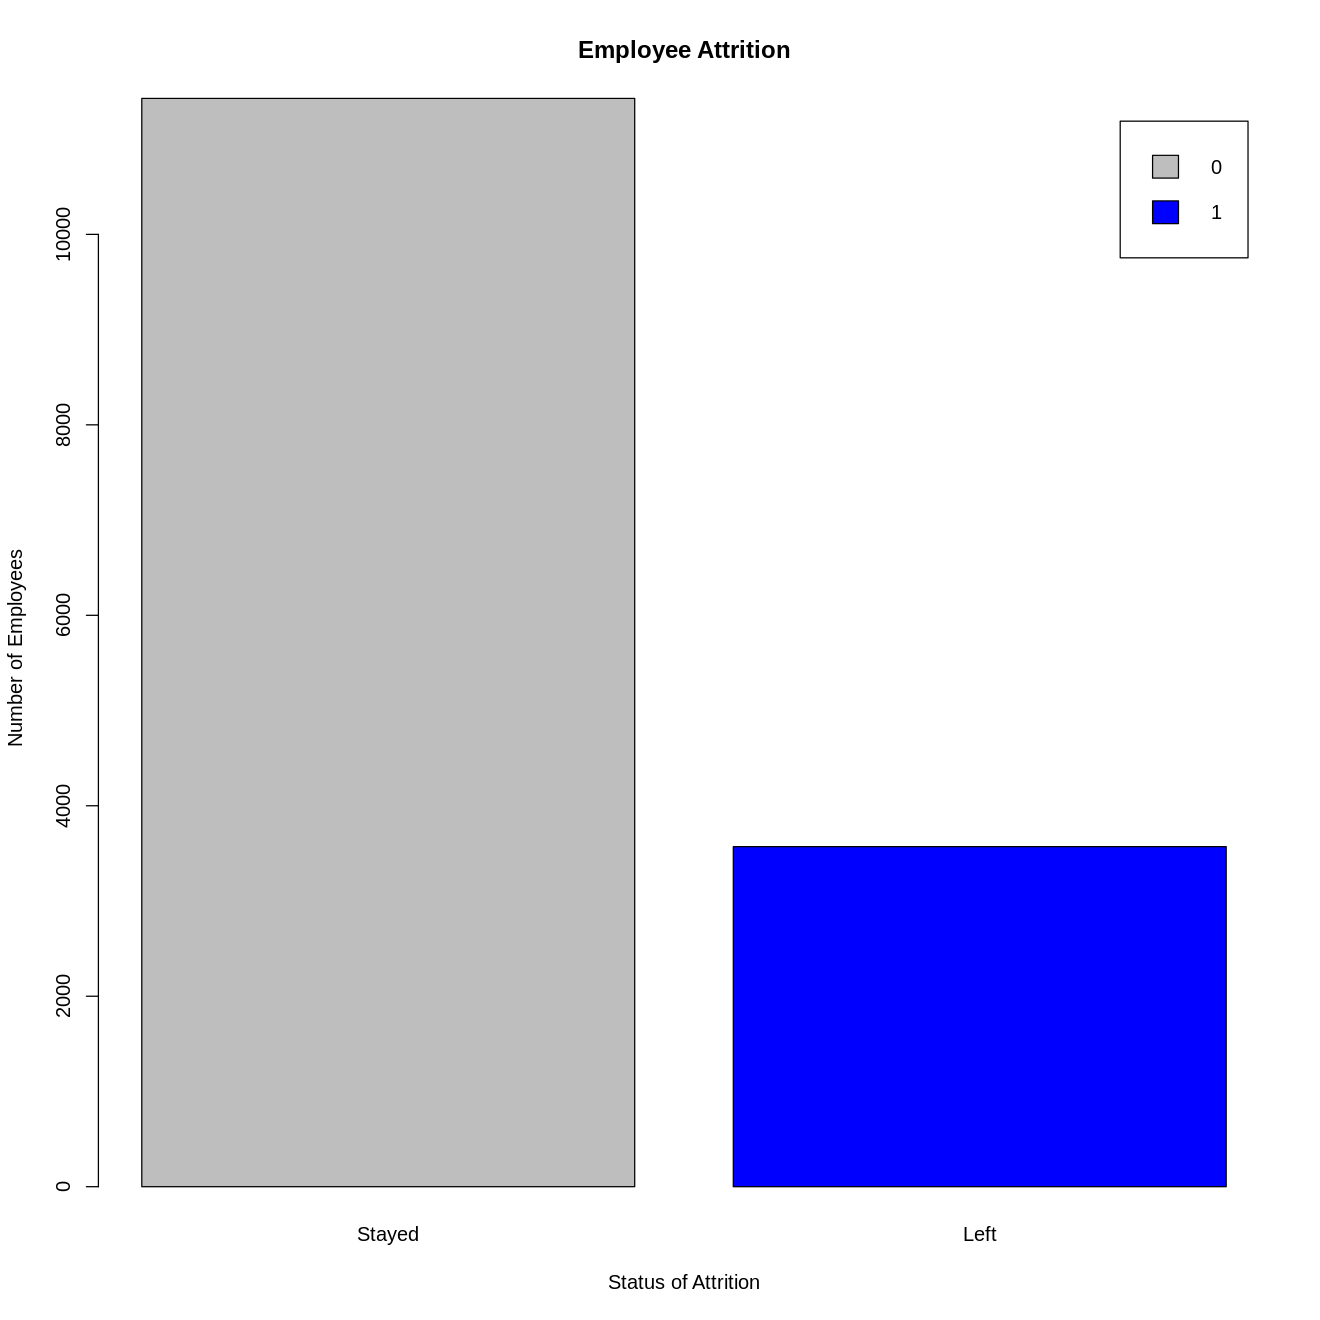

In [ ]:
#Using barplot to visualize the employee that left and stayed
barplot(table(HR_data$left), col = c("grey", "blue"),
        main = "Employee Attrition",
        names.arg = c("Stayed", "Left"),
        ylab = "Number of Employees",
        xlab = "Status of Attrition",
        legend.text = TRUE,
        beside = TRUE)


### Display the statistical summary of the employee's data

In [ ]:
# Install the psych package
install.packages("psych")

# Load the psych package
library(psych)


describe(HR_data)


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



HR_data 

 10  Variables      14999  Observations
--------------------------------------------------------------------------------
satisfaction_level 
       n  missing distinct     Info     Mean      Gmd      .05      .10 
   14999        0       92        1   0.6128   0.2823     0.11     0.21 
     .25      .50      .75      .90      .95 
    0.44     0.64     0.82     0.92     0.96 

lowest : 0.09 0.1  0.11 0.12 0.13, highest: 0.96 0.97 0.98 0.99 1   
--------------------------------------------------------------------------------
last_evaluation 
       n  missing distinct     Info     Mean      Gmd      .05      .10 
   14999        0       65        1   0.7161   0.1973     0.46     0.49 
     .25      .50      .75      .90      .95 
    0.56     0.72     0.87     0.95     0.98 

lowest : 0.36 0.37 0.38 0.39 0.4 , highest: 0.96 0.97 0.98 0.99 1   
--------------------------------------------------------------------------------
ProjectNumber 
       n  missing distinct     Info    

## PRE-ANALYSIS

In [ ]:
#Narrow the data statistics description to employee's attrition
#using other features
turnover_stats <- HR_data[, c("satisfaction_level","last_evaluation",
                              "ProjectNumber","average_montly_hours",
                              "SpentYearsAtCompany","Work_accident","left",
                              "promotion_last_5years")]

aggregate(turnover_stats[,c("satisfaction_level","last_evaluation",
                            "ProjectNumber","average_montly_hours",
                            "SpentYearsAtCompany","Work_accident","left",
                            "promotion_last_5years")],
                             by= list(Atrrition_status = turnover_stats$left),
                             FUN =mean)


Atrrition_status,satisfaction_level,last_evaluation,ProjectNumber,average_montly_hours,SpentYearsAtCompany,Work_accident,left,promotion_last_5years
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0,0.6668096,0.7154734,3.786664,199.0602,3.380032,0.17500875,0,0.026251313
1,0.4400980,0.7181126,3.855503,207.4192,3.876505,0.04732568,1,0.005320638


Looking at this summary statistics based on people that left and stayed using other features for the analysis, in the level of satisfaction, the employees that left have lower level of satisfaction which is below 50%. Their evaluation rate and the number of projects executed are more than the employees who stayed. The overall average monthly hours done was achieved by the employees that left with about 207.42 hours. The left employees spent more years at the company with a least work_accident and yet they were least promoted. I think from this analysis, this was what contributed to their resgination.

## Exploratory Data Analysis (EDA)

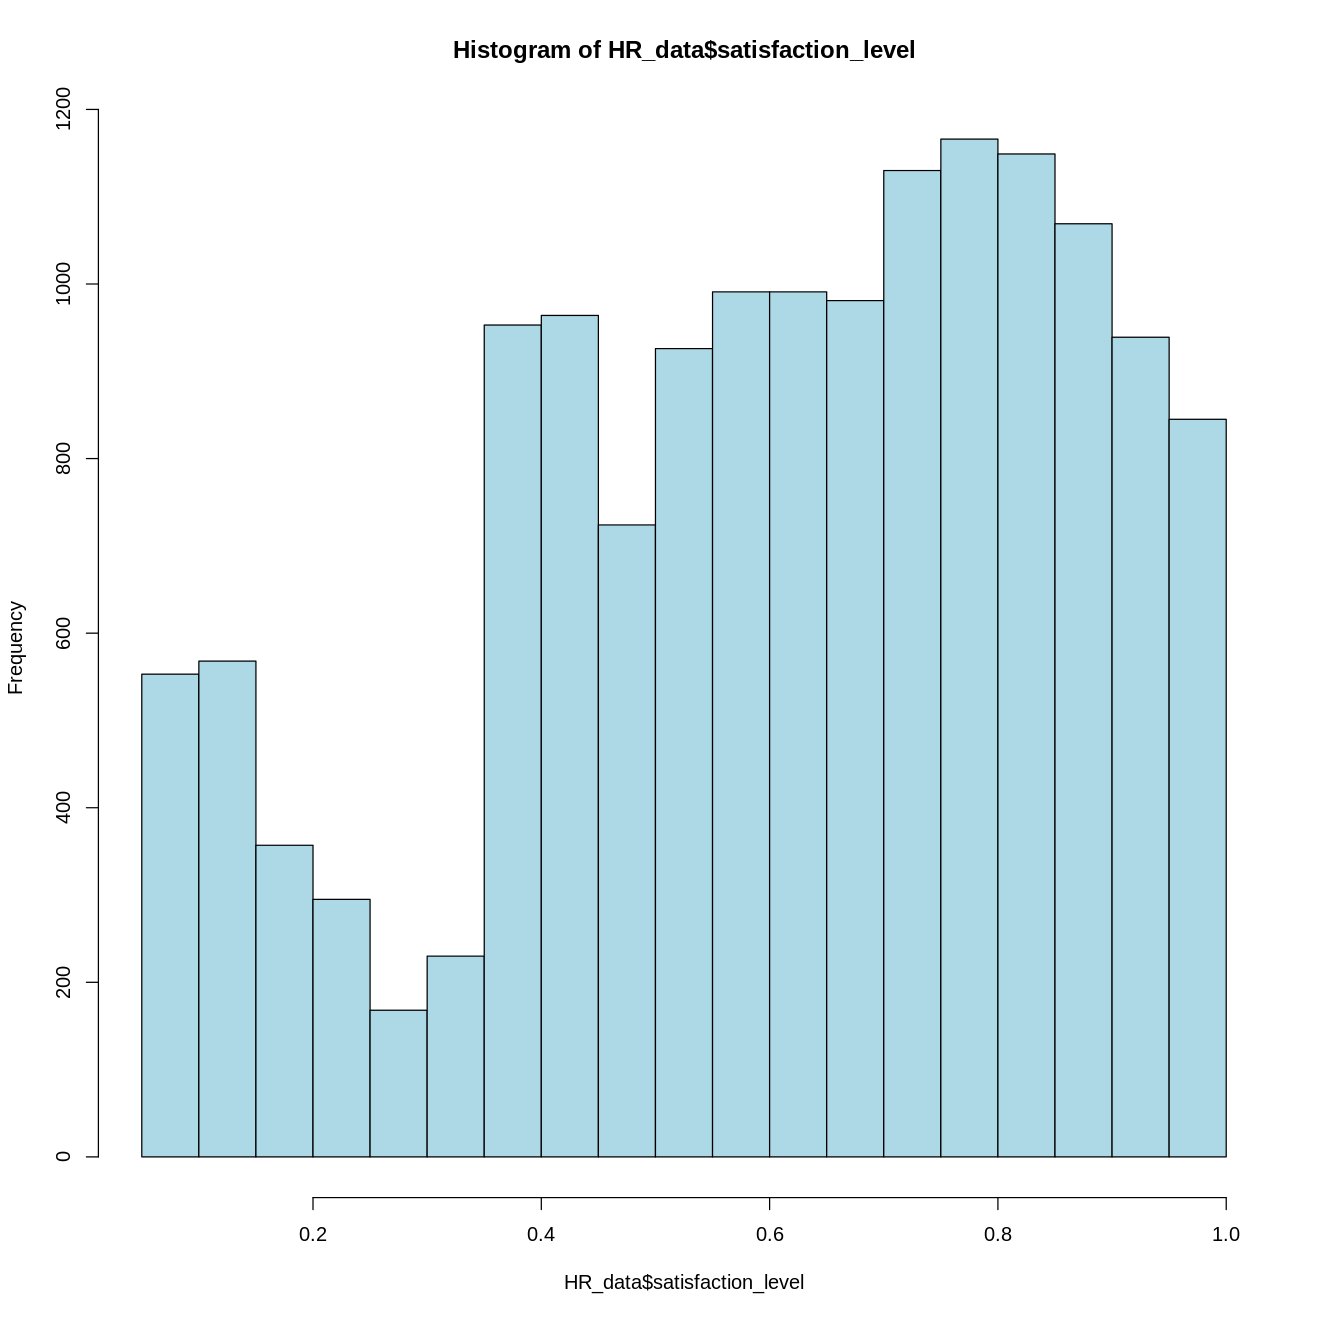

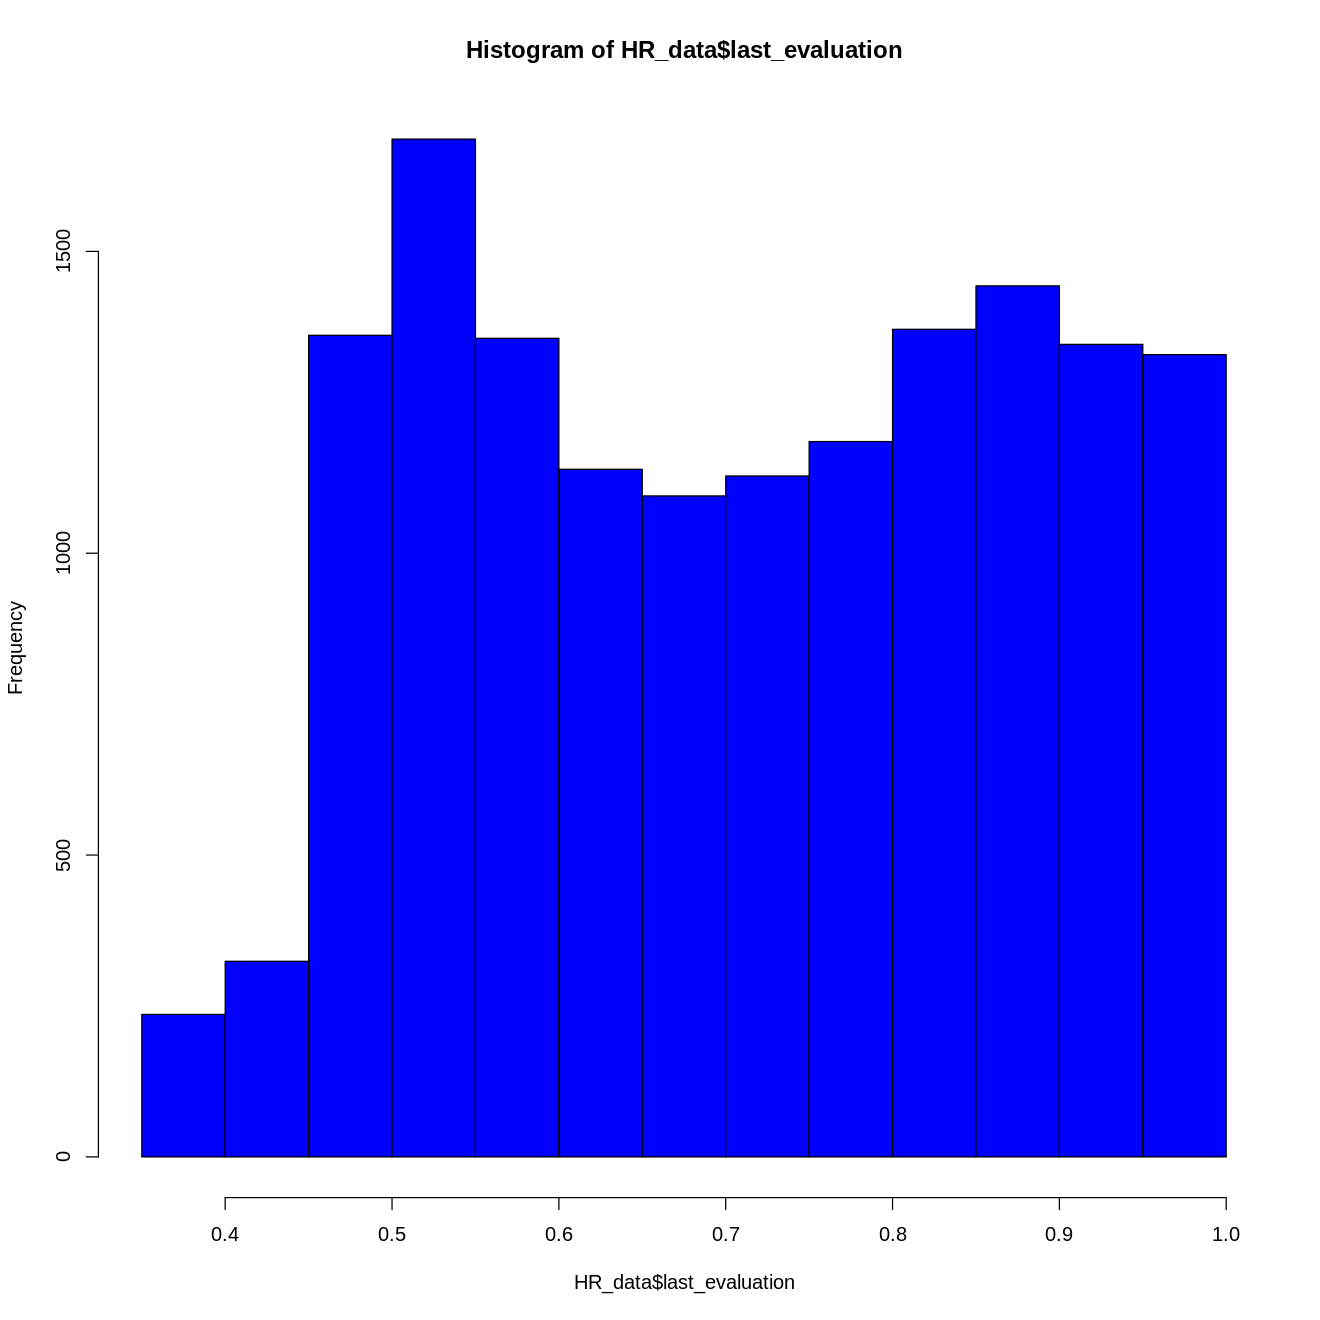

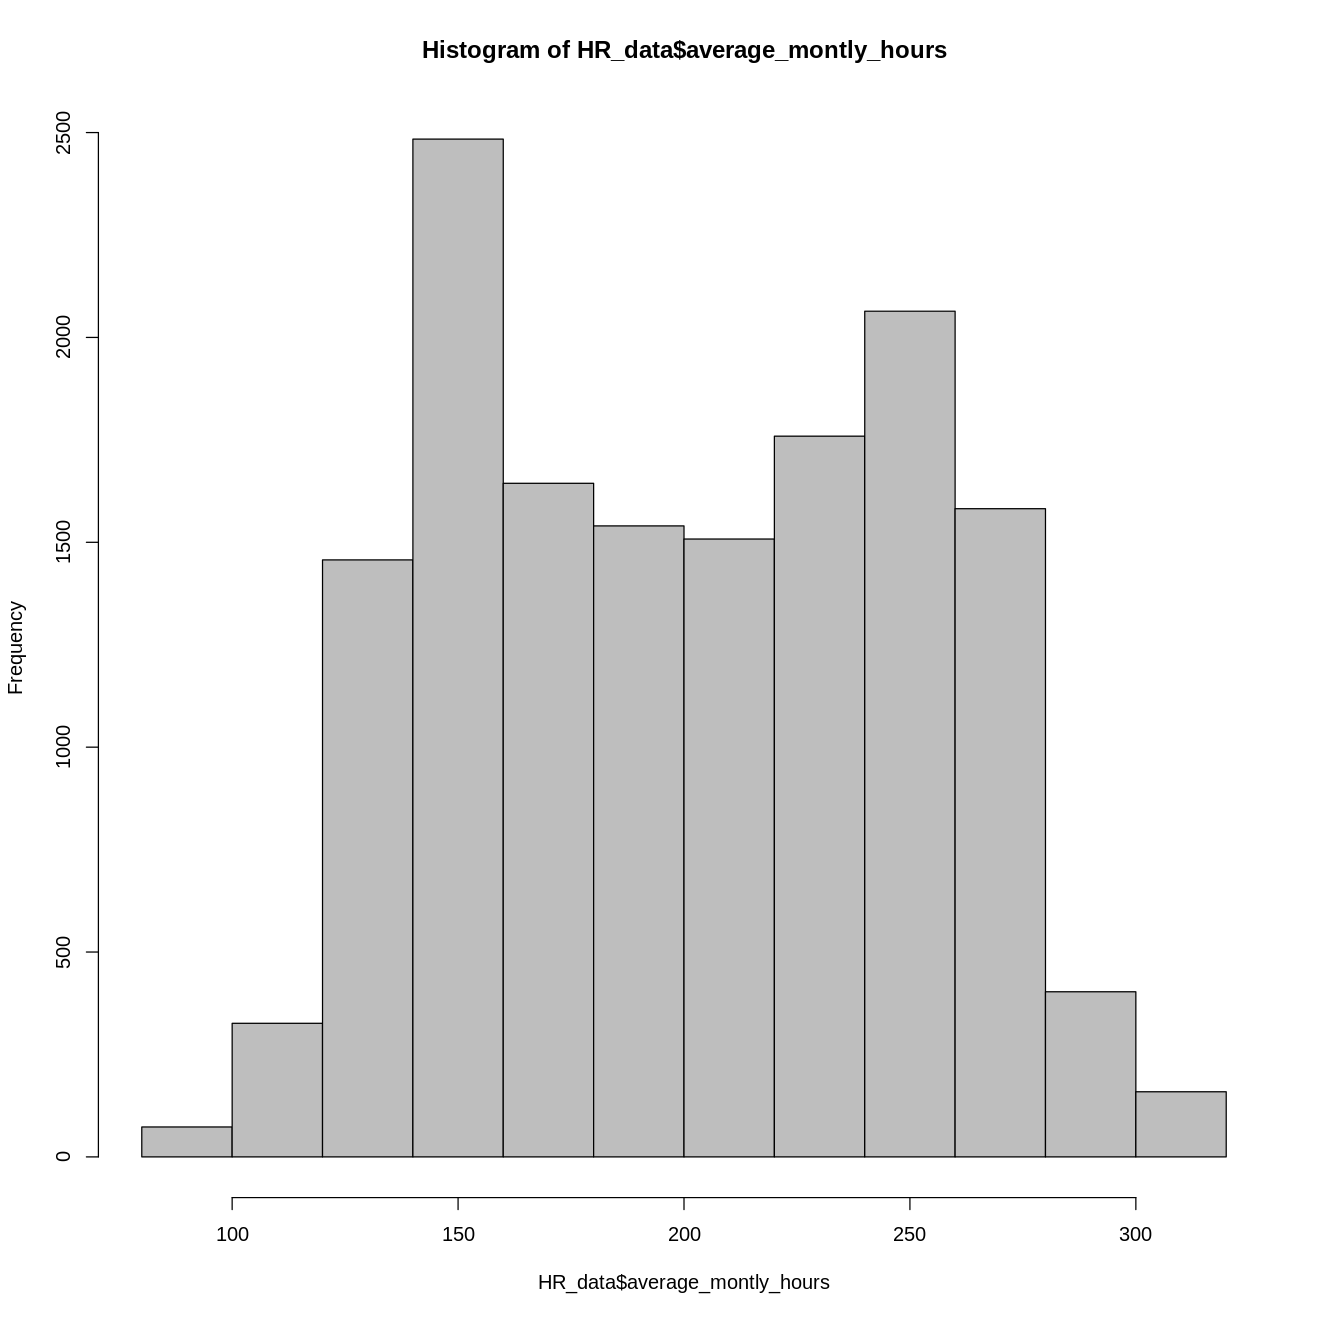

In [ ]:
par(mfrow=c(1,1))
hist(HR_data$satisfaction_level, col="lightblue")
hist(HR_data$last_evaluation, col="blue")
hist(HR_data$average_montly_hours, col="grey")


Satisfaction level- There is a trimodal major distribution on employees with high satisfaction over low satisfaction.

Evaluation level - There is a bimodal distribution of employees for low evaluations (less than 0.6) and high evaluations (more than 0.8).

AverageMonthlyHours - This is another bimodal distribution of employees with lower and higher average monthly hours (less than 150 hours & more than 250 hours)
The evaluation and average monthly hour graphs both share a similar distribution.

Employees with lower average monthly hours were evaluated less and vice versa.


**Are the people who are not promoted leaving the company?**
Let's find out!

In [ ]:
# Create a contingency table
promoted <- table(HR_data$left, HR_data$promotion_last_5years)

# Print the result
print(promoted)

   
        0     1
  0 11128   300
  1  3552    19


About 2.7% of people who were promoted did not leave the company and 0.53% of employees not promoted left the company. I think there is a correlation between the two. We will find out.

## Correlation Matrix and  Heatmap

In [ ]:
#Correlation Matrix
install.packages("reshape2")
library(reshape2)

#Install ggplot2 package
install.packages("ggplot2")

# Load ggplot2 library
library(ggplot2)

turnover_stats <-HR_data[,c("satisfaction_level","last_evaluation","ProjectNumber","average_montly_hours","SpentYearsAtCompany","Work_accident","left","promotion_last_5years")]
cor(turnover_stats)



Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



,satisfaction_level,last_evaluation,ProjectNumber,average_montly_hours,SpentYearsAtCompany,Work_accident,left,promotion_last_5years
satisfaction_level,1.00000000,0.105021214,-0.142969586,-0.020048113,-0.100866073,0.058697241,-0.38837498,0.025605186
last_evaluation,0.10502121,1.000000000,0.349332589,0.339741800,0.131590722,-0.007104289,0.00656712,-0.008683768
ProjectNumber,-0.14296959,0.349332589,1.000000000,0.417210634,0.196785891,-0.004740548,0.02378719,-0.006063958
average_montly_hours,-0.02004811,0.339741800,0.417210634,1.000000000,0.127754910,-0.010142888,0.07128718,-0.003544414
SpentYearsAtCompany,-0.10086607,0.131590722,0.196785891,0.127754910,1.000000000,0.002120418,0.14482217,0.067432925
Work_accident,0.05869724,-0.007104289,-0.004740548,-0.010142888,0.002120418,1.000000000,-0.15462163,0.039245435
left,-0.38837498,0.006567120,0.023787185,0.071287179,0.144822175,-0.154621634,1.00000000,-0.061788107
promotion_last_5years,0.02560519,-0.008683768,-0.006063958,-0.003544414,0.067432925,0.039245435,-0.06178811,1.000000000


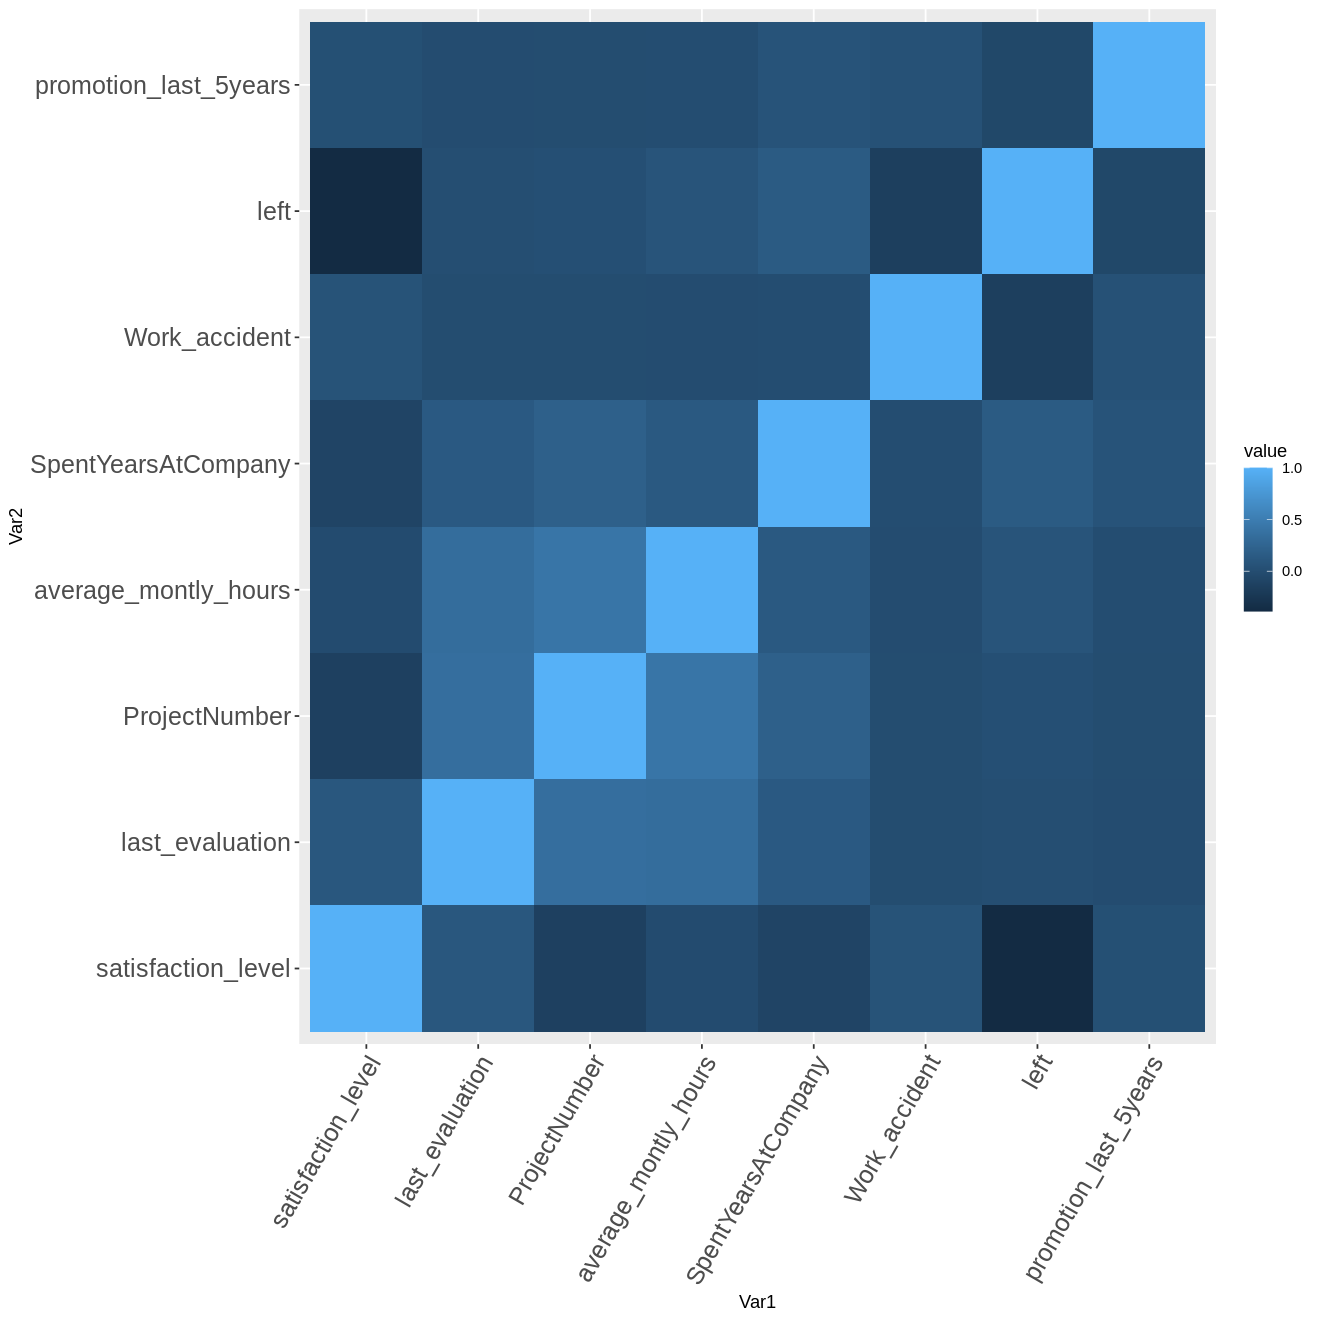

In [ ]:
cormat <-cor(turnover_stats)
matrix_melt <- melt(cormat)
options(repr.plot.width =11, repr.plot.height = 11)
ggplot(data = matrix_melt, aes(x =Var1, y = Var2, fill=value)) +
  geom_tile() +theme(axis.text.x = element_text(size = 15, angle = 60, hjust = 1)) +
   geom_tile() +theme(axis.text.y = element_text(size = 15, hjust = 1))

## Correlation and Heatmap Analysis

**Turnover vs Promotion:** -0.06178811
**NB:** They are **highly negatively** correlated showing that employees who left may have not being promoted.

***
**Features that are Moderate Positively Correlated :**

- ProjectNumber vs evaluation: 0.349333
- ProjectNumber vs averageMonthlyHours: 0.417211
- average_monthly_hours vs evaluation: 0.339742

**NB:** There is a **positive** correlation between ProjectNumber, evaluation and average_monthly_hours therefore, this could be said that the employees who did more number of projects and spent longer monthly hours were highly evaluated.  
***
**Moderate Negatively Correlated Feature:**
 - satisfaction vs turnover:  -0.388375

**NB:** In this context, Satisfaction and turnover are negatively correlated which could mean that employees who left were less satisfied.

**Hypothetical Questions**
- What features affect our target variable the most (left)?
- What features have strong correlations with each other?
- Can we do a more in depth examination of these features?

### Let's compare the Salary and Left

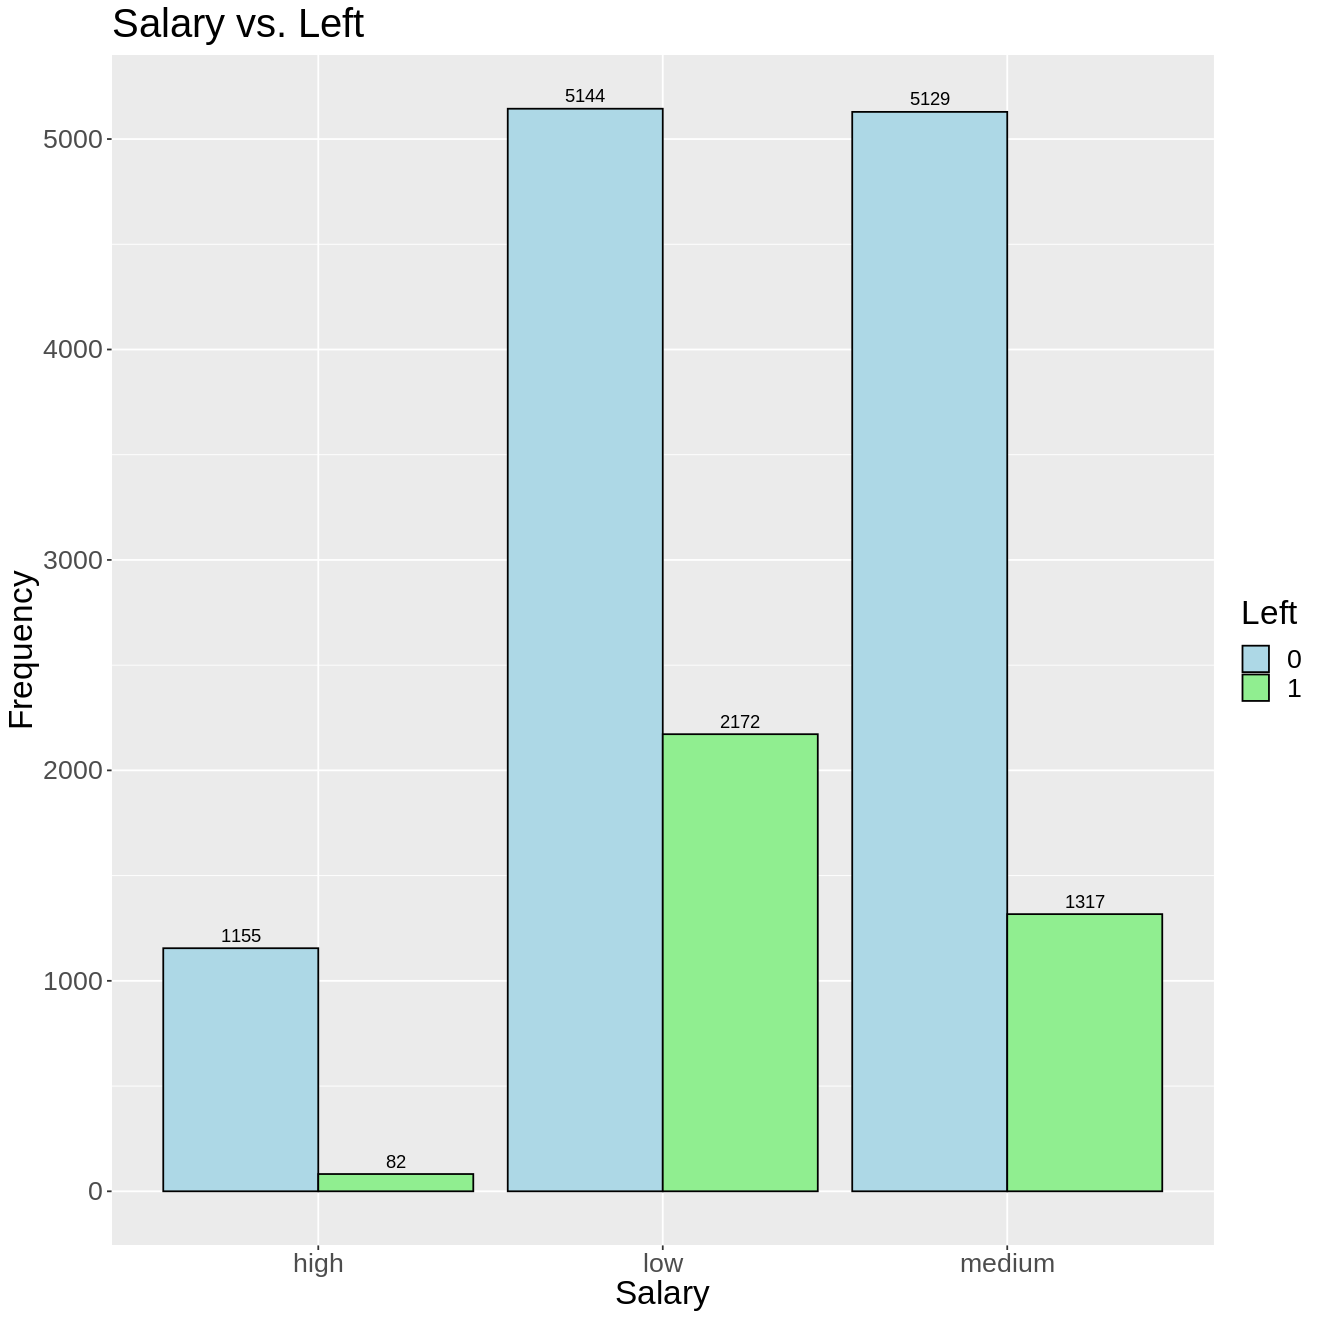

In [ ]:

salary_left <- table(HR_data$salary, HR_data$left)
salary_left <- as.data.frame(salary_left)

# Creating a bar plot
p <- ggplot(salary_left, aes(x = Var1, y = Freq, fill = Var2)) +
   geom_text(aes(label = Freq), position = position_dodge(width = 0.9), vjust = -0.5) +  # Display values on bars
  geom_bar(position = "dodge", stat = 'identity', color = "black") +
  scale_fill_manual(values = c("lightblue", "lightgreen")) +
  labs(title = "Salary vs. Left",
       x = "Salary",
       y = "Frequency",
       fill = "Left") +
         theme(text = element_text(size = 20))

print(p)


The majority of the employees who left were low and medium salary earners while the high salary earners who left were minor. However, low salary earners left the company more than others.

### Department vs Left

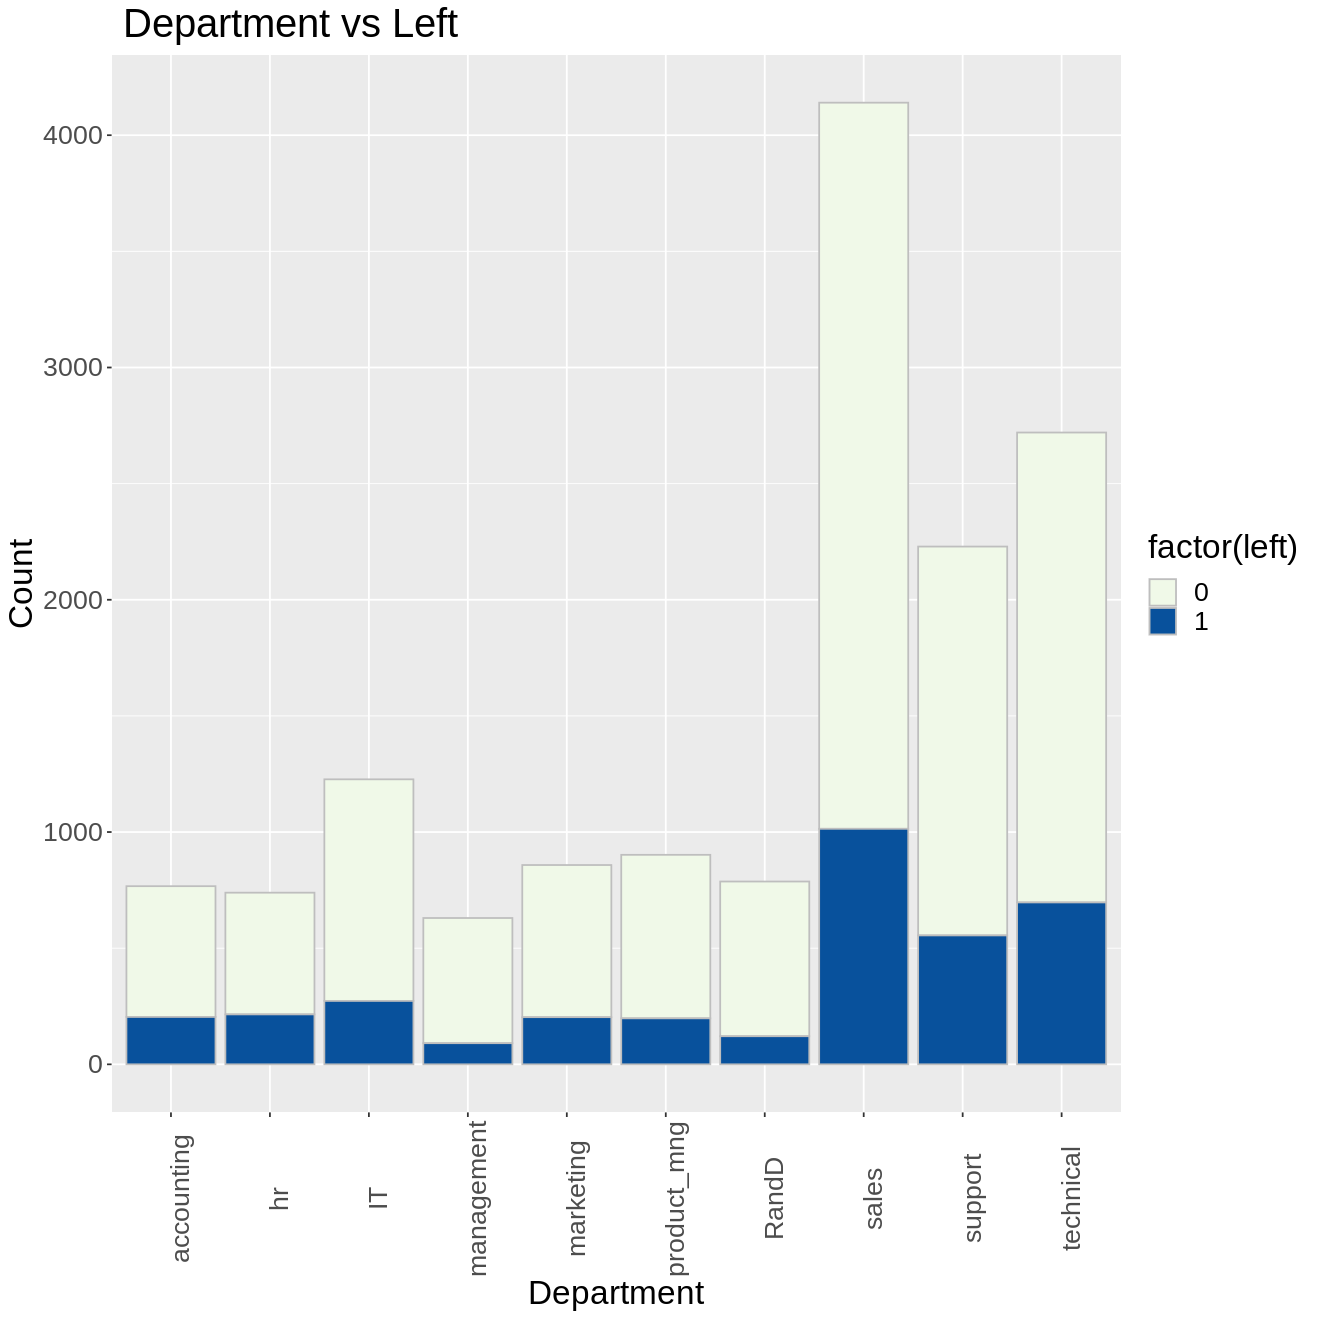

In [ ]:
library(ggplot2)

# Assuming your data frame is named df
ggplot(HR_data, aes(x = Department, fill = factor(left))) +
  geom_bar(position = 'stack', stat = 'Count', color = 'grey') +
  scale_fill_manual(values = c("#f0f9e8", "#08519c")) +  # Custom color palette (Blues_r)
  labs(title = " Department vs Left", x = "Department", y = "Count") +
  theme(axis.text.x = element_text(angle = 90, vjust = 1)) + theme(text = element_text(size = 20))

Sales, Technical, Support department were the top 3 departments that have employees turnover while the Management department has the least employee turnover.

### ProjectNumber VS. Left

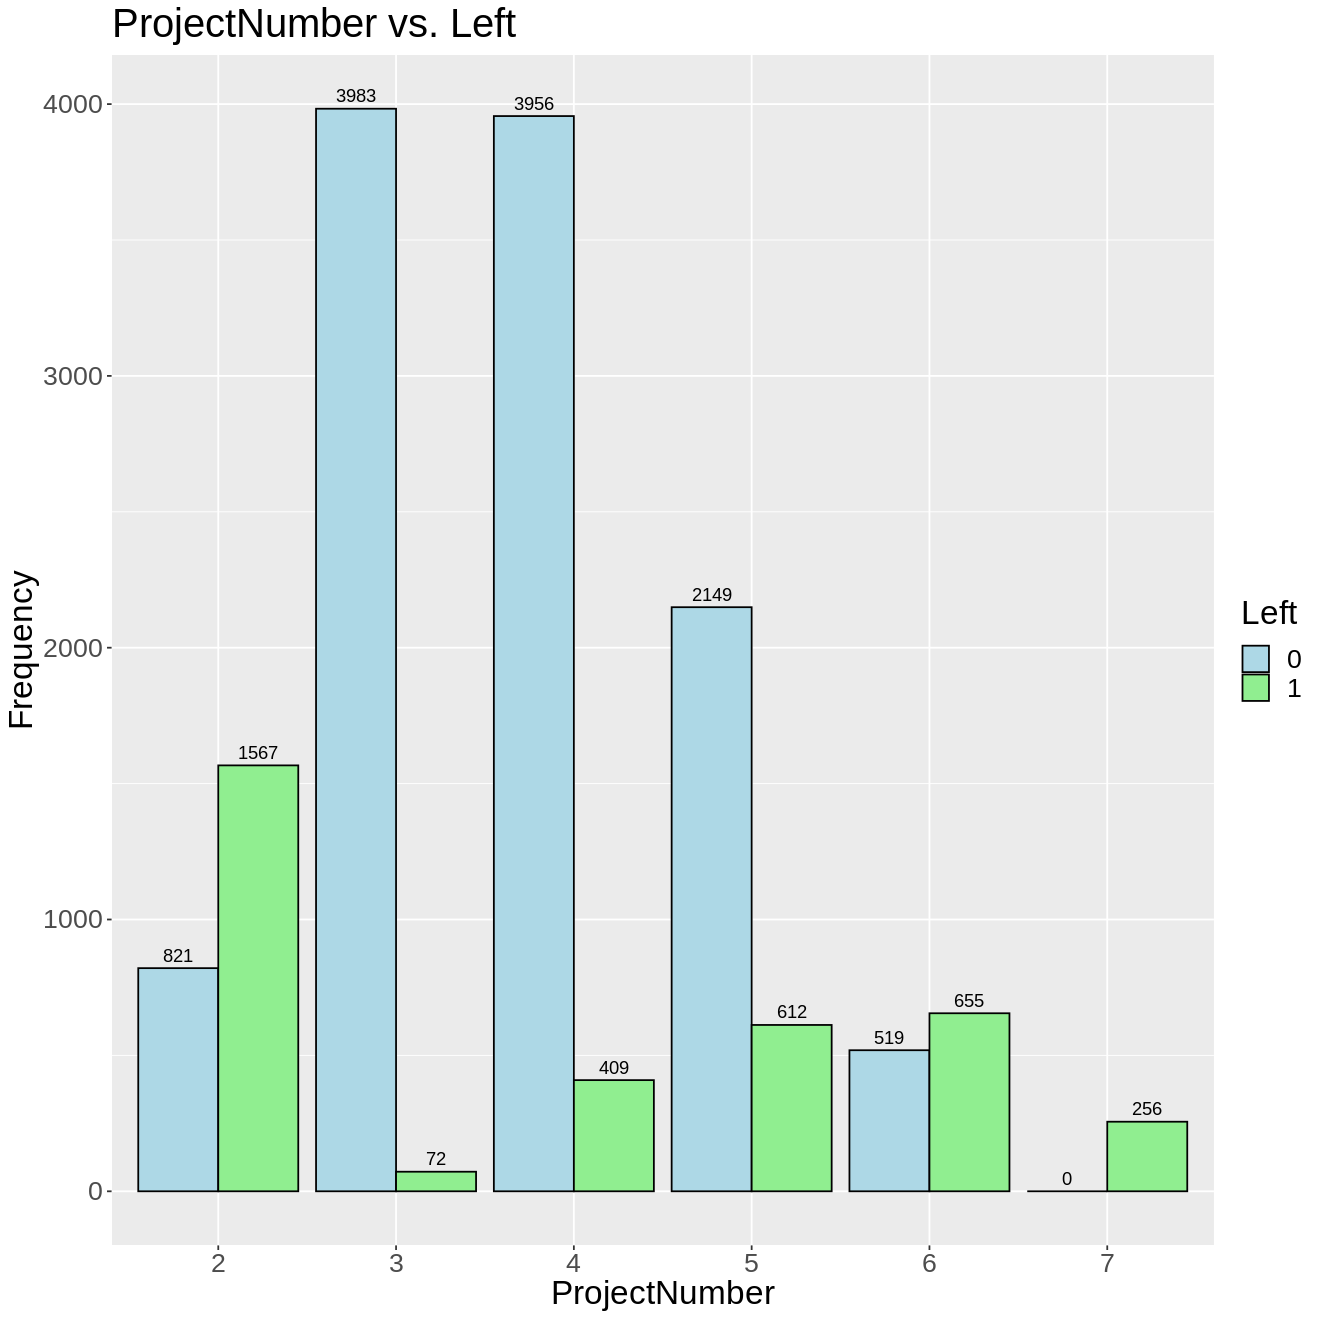

In [ ]:

# Creating a bar plot to visualize the project counts and turnover
proj_left1 <- table(HR_data$ProjectNumber, HR_data$left)
proj_left <- as.data.frame(proj_left1)

# Creating a bar plot
p <- ggplot(proj_left, aes(x = Var1, y = Freq, fill = Var2)) +
   geom_text(aes(label = Freq), position = position_dodge(width = 0.9), vjust = -0.5) +  # Display values on bars
  geom_bar(position = "dodge", stat = 'identity', color = "black") +
  scale_fill_manual(values = c("lightblue", "lightgreen")) +
  labs(title = "ProjectNumber vs. Left",
       x = "ProjectNumber",
       y = "Frequency",
       fill = "Left") +
         theme(text = element_text(size = 20))

print(p)

This could satisfy that project number and turnover is lowly positively**(+**) correlated. The employees who achieved the highest number of projects (7) were all left, none of them stayed. This is quite surprising!

**So the question should be why did they leave the company despite working so hard to get more projects done?**

However, the employees who did 2 projects left more than the ones that stayed.

Most employees who did 3 to 4 projects stayed having very few of them left especially the ones on project number 3.

### Evaluation VS. Left

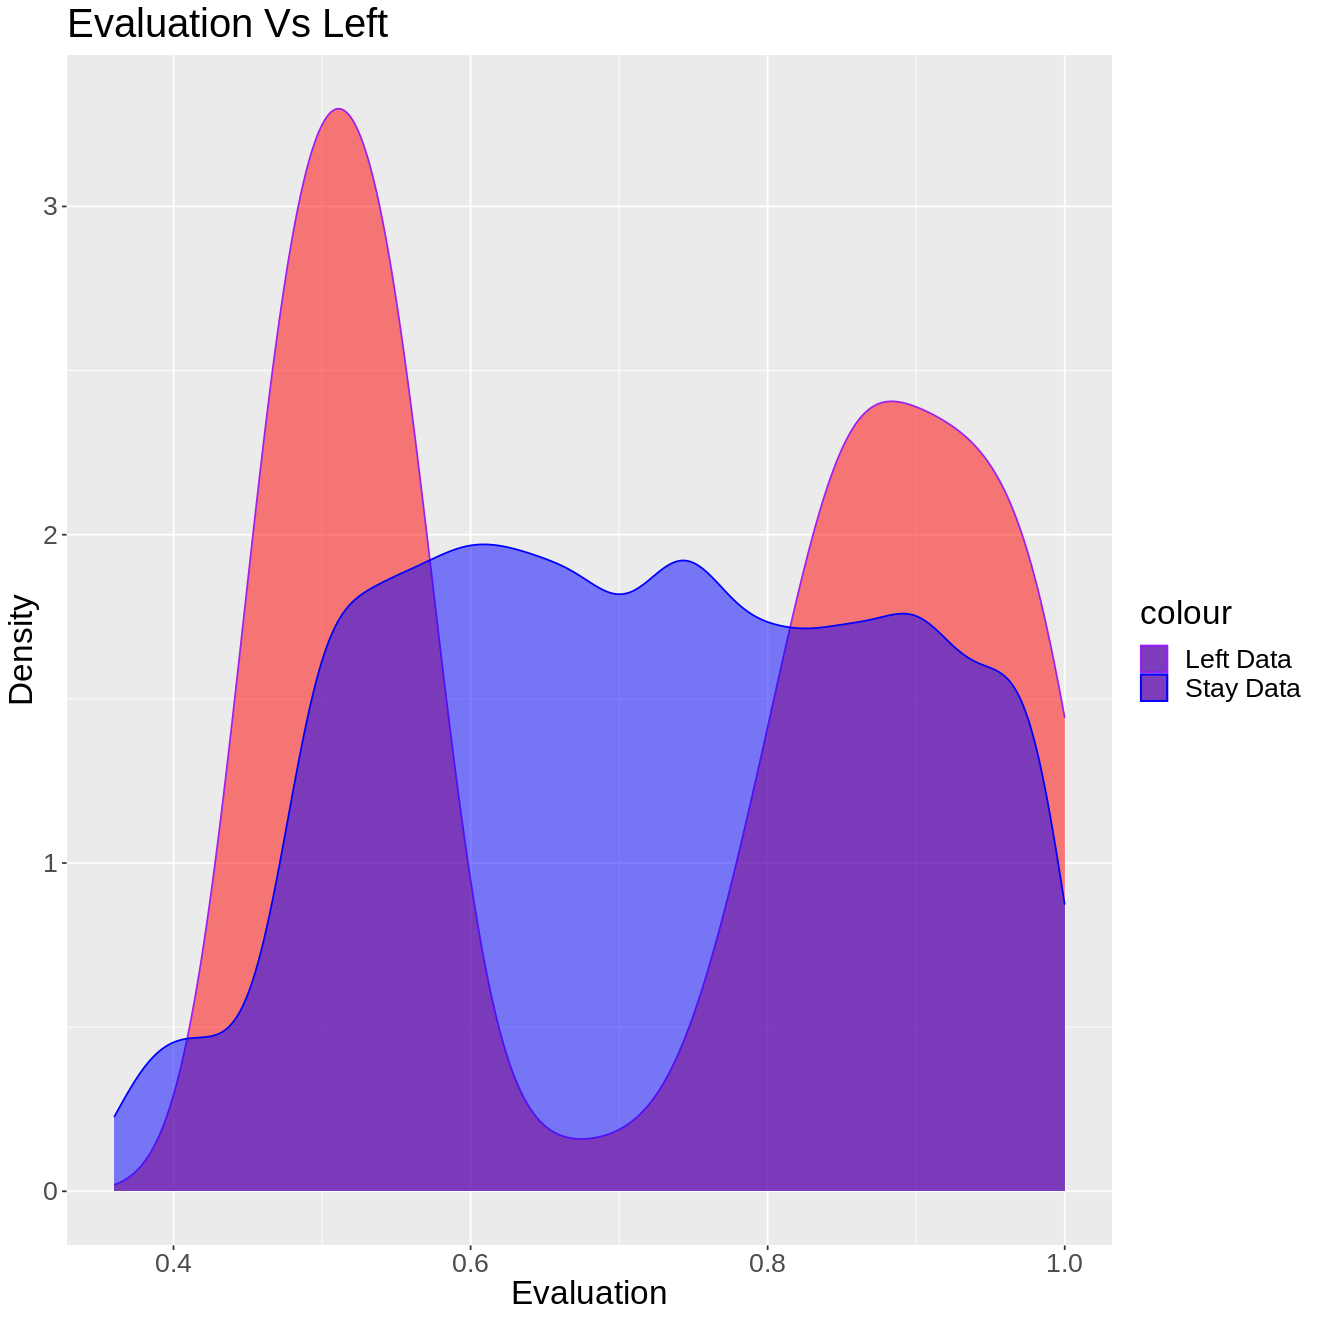

In [ ]:
#Kernel Density Plot
df_left <-subset(HR_data,left==1)
df_stay<-subset(HR_data,left==0)

plot <- ggplot() +
  geom_density(aes(x = last_evaluation, color = "Left Data"), data = df_left, fill = "red", alpha = 0.5) +
  geom_density(aes(x = last_evaluation, color = "Stay Data"), data = df_stay, fill = "blue", alpha = 0.5) +
  labs(title = "Evaluation Vs Left",
       x = "Evaluation",
       y = "Density") +
  scale_color_manual(values = c("purple", "blue"))+
  theme(text = element_text(size = 20))


# Display the plot
print(plot)

There is a bimodal distribution for the employee's turnover.

Employees with **low evaluation** tend to leave the company more.

Employees with **higher evaluation** tend to leave the company more.

The spot for employees that stayed is within 0.6-0.8 evaluation which is about 3 - 4 project counts vis turnover.

This also agrees with the previous analysis about number of projects and turnover.

This suggests why evaluation and projectnumber is moderately positively correlated based on the correlation matrix above.

### Average_Monthly_Hours Vs. Left


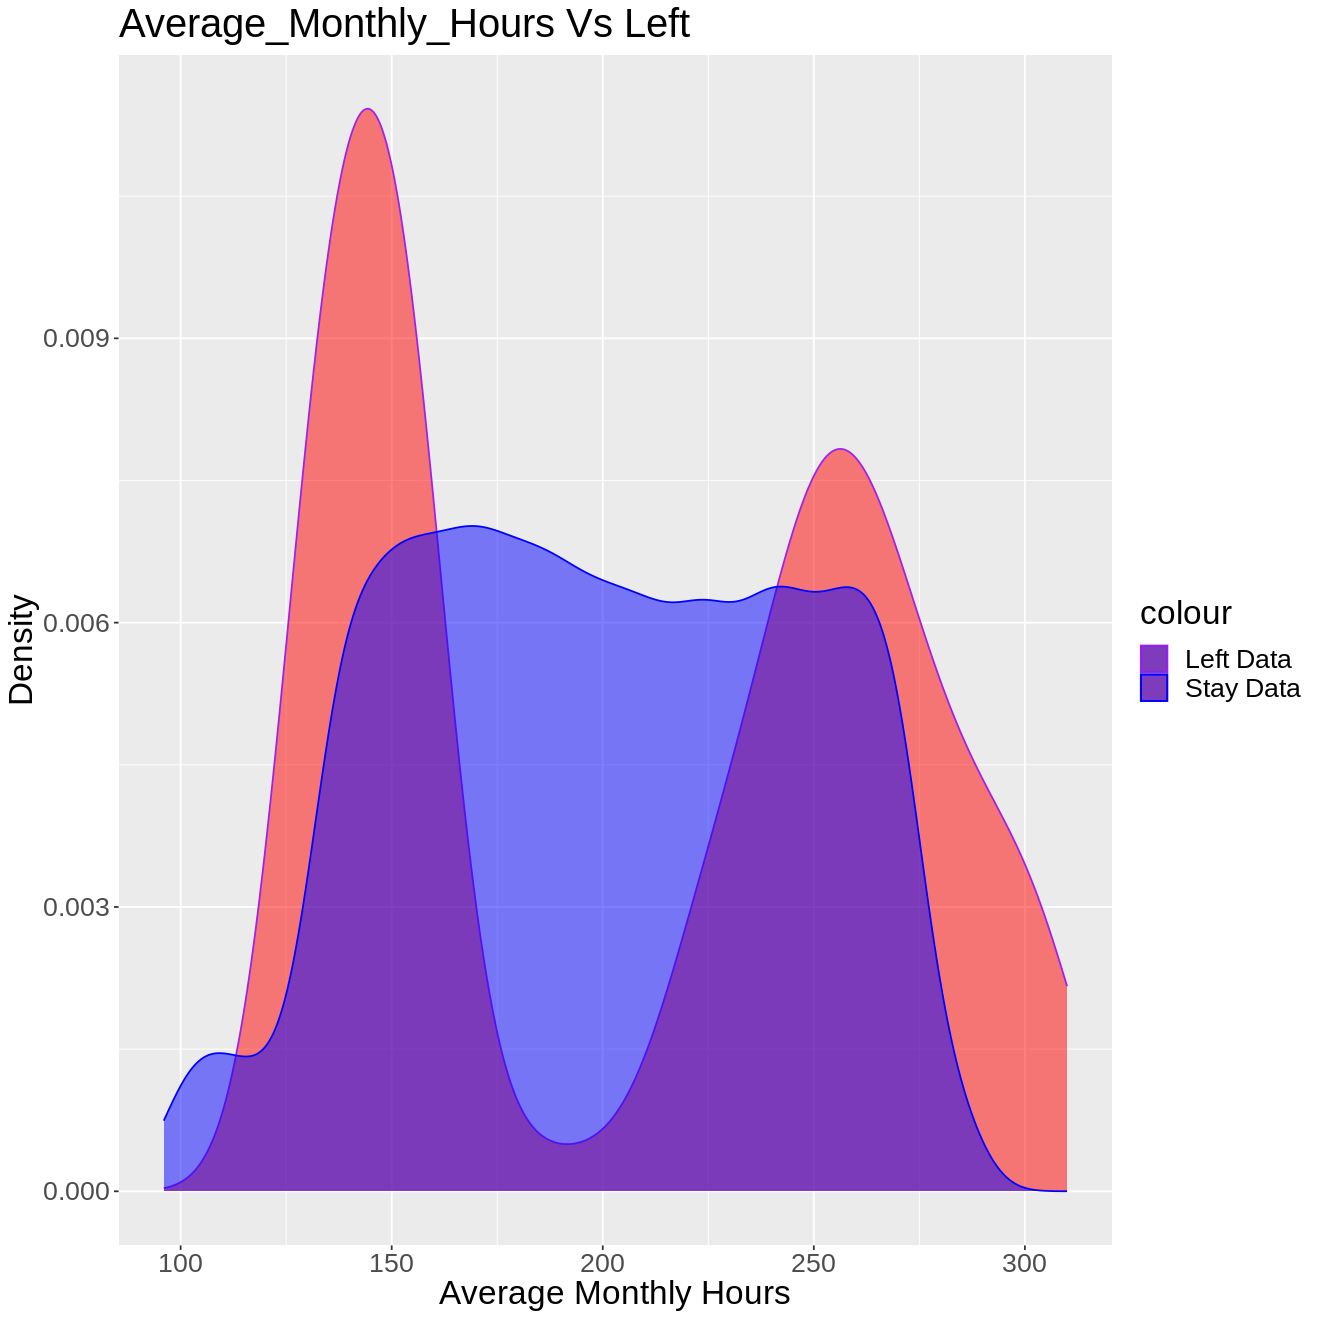

In [ ]:
# Kernel Density Plot
plot <- ggplot() +
  geom_density(aes(x = average_montly_hours, color = "Left Data"), data = df_left, fill = "red", alpha = 0.5) +
  geom_density(aes(x = average_montly_hours, color = "Stay Data"), data = df_stay, fill = "blue", alpha = 0.5) +
  labs(title = "Average_Monthly_Hours Vs Left",
       x = "Average Monthly Hours",
       y = "Density") +
  scale_color_manual(values = c("purple", "blue"))+
  theme(text = element_text(size = 20))


# Display the plot
print(plot)


Bi-modal distribution for employees that turnover showing peak of their modes.

Employees who had less hours of work (~150hours or less) left the company more.

Employees who had too many hours of work (~250 or more) left the company.

Employees who left generally were underworked or overworked.

**Based on this analysis, does salary impact the average monthly hours?**

**Is it that those that worked more were underpaid or what?**

**What could have influenced that?**

### Satisfaction VS. Left

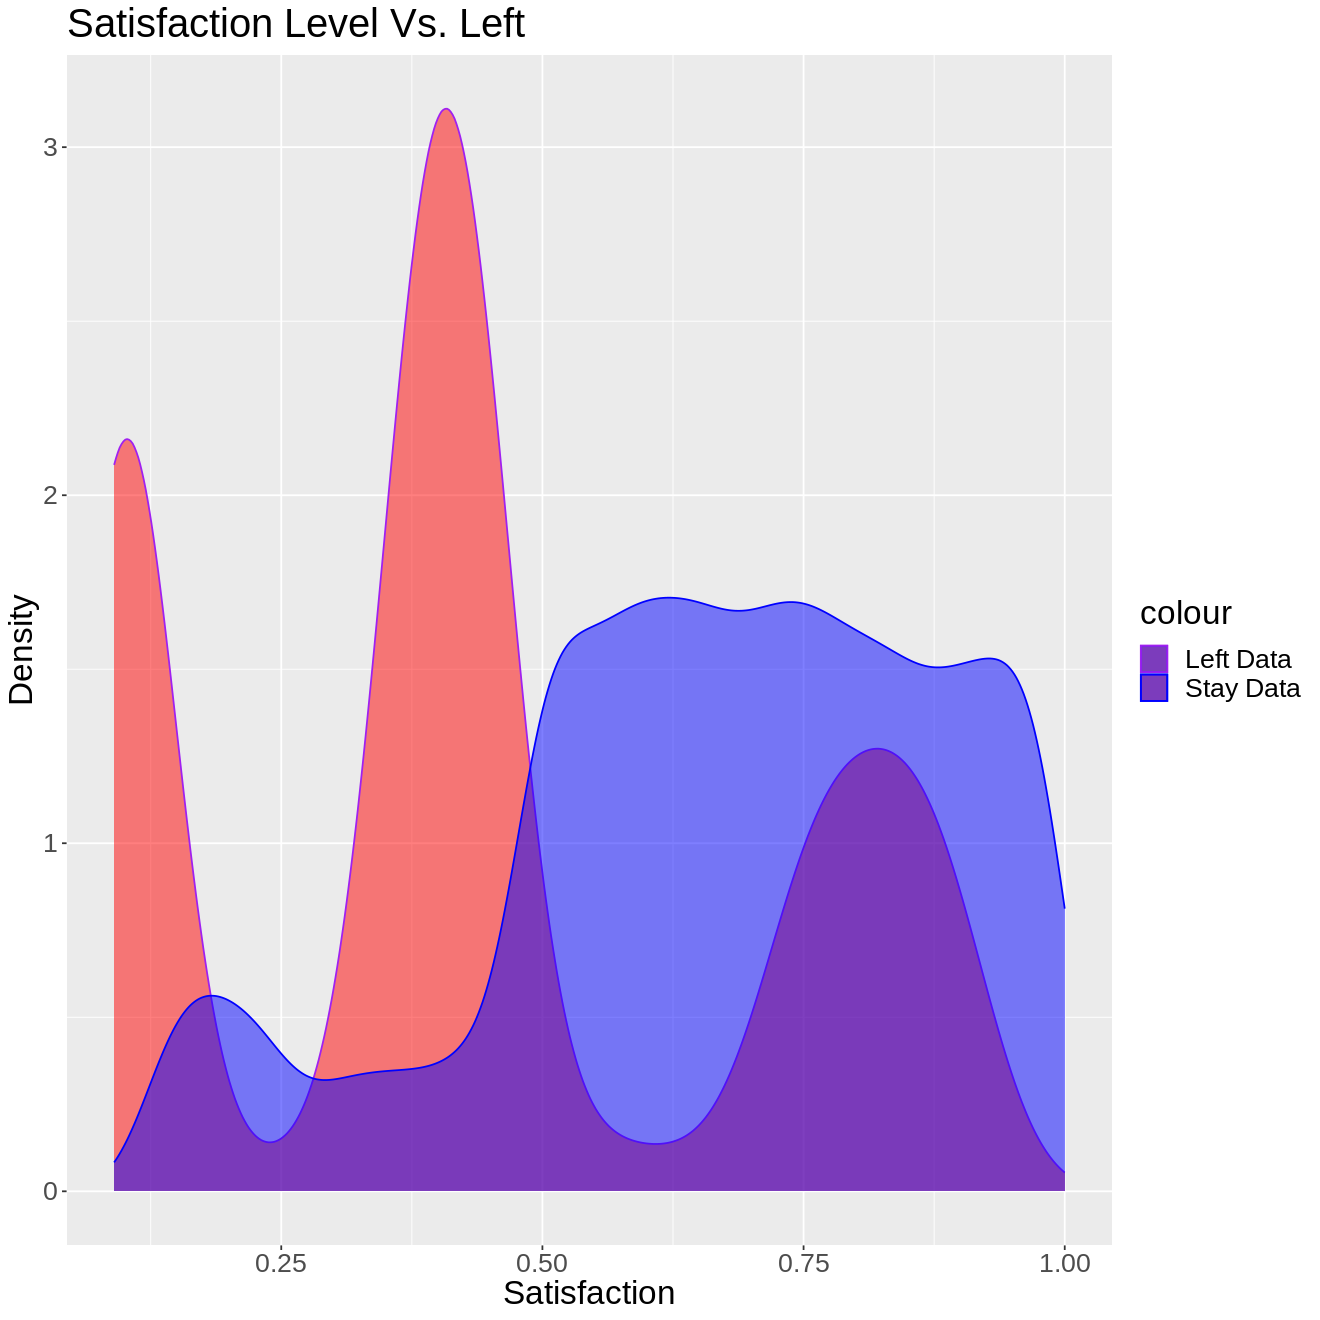

In [ ]:
# Kernel Density Plot
plot <- ggplot() +
  geom_density(aes(x = satisfaction_level, color = "Left Data"), data = df_left, fill = "red", alpha = 0.5) +
  geom_density(aes(x = satisfaction_level, color = "Stay Data"), data = df_stay, fill = "blue", alpha = 0.5) +
  labs(title = "Satisfaction Level Vs. Left",
       x = "Satisfaction",
       y = "Density") +
  scale_color_manual(values = c("purple", "blue"))+
  theme(text = element_text(size = 20))


# Display the plot
print(plot)

- There is a **tri-modal** distribution for employees that turnovered
 - Employees who had really low satisfaction levels **(0.2 or less)** left the company more.
 - Employees who had low satisfaction levels **(0.3~0.5)** left the company more.
 - Employees who had really high satisfaction levels **(0.7 or more)** also left the company however, this is the group that have more employees who stayed.

### Average Monthly Hours VS Salary vs Turnover(Left)

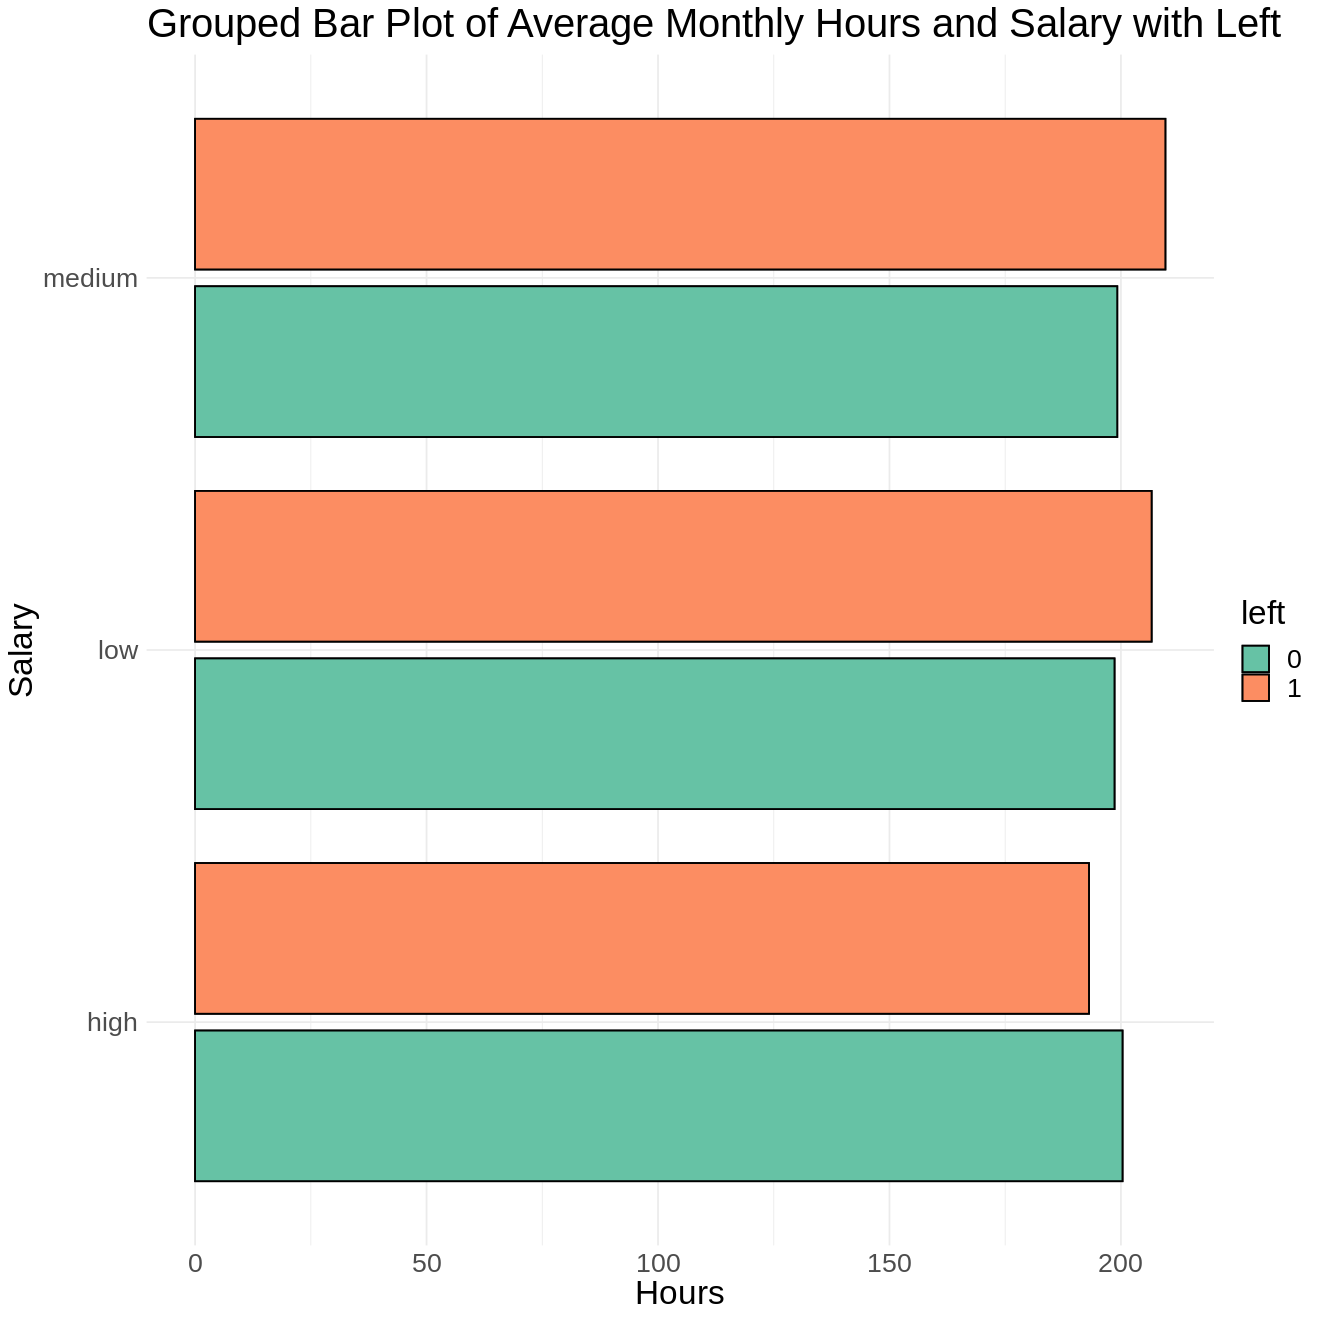

In [ ]:
# Grouped Bar Plot of Average Monthly Hours and Salary with Left
# Convert turnover to a factor
HR_data$left <- factor(HR_data$left)

# Grouped Bar Plot of Average Monthly Hours and Salary with Turnover
plot <- ggplot(HR_data, aes(x = average_montly_hours, fill = left)) +
  geom_bar(stat = "summary", fun = "mean", position = position_dodge2(width = 0.8),
           aes(y = salary), color = "black") +
  geom_bar(stat = "summary", fun = "mean", position = position_dodge2(width = 0.8),
           aes(y = salary), color = "black", alpha = 0.5) +
  labs(title = "Grouped Bar Plot of Average Monthly Hours and Salary with Left",
       x = "Hours",
       y = "Salary",
       fill = "left") +
  scale_fill_manual(values = c("#66c2a5", "#fc8d62")) +  # Customize colors for turnover
  theme_minimal() + theme(text = element_text(size = 20))


# Display the plot
print(plot)


**Let's answer these questions from our graph above:**

Based on this analysis, does salary impact the average monthly hours?

Is it that those that worked more were underpaid or what?

What could have influenced that?

***
From the graph, medium and low salary earners who worked more hours tend to leave the company while high salary earners that also worked more hours stayed in the company.

This is to show that money motivates employees, they would be happy to stay when they know that they get value for the hours they have worked.

## ProjectNumber Vs. AverageMonthlyHours Vs. Left

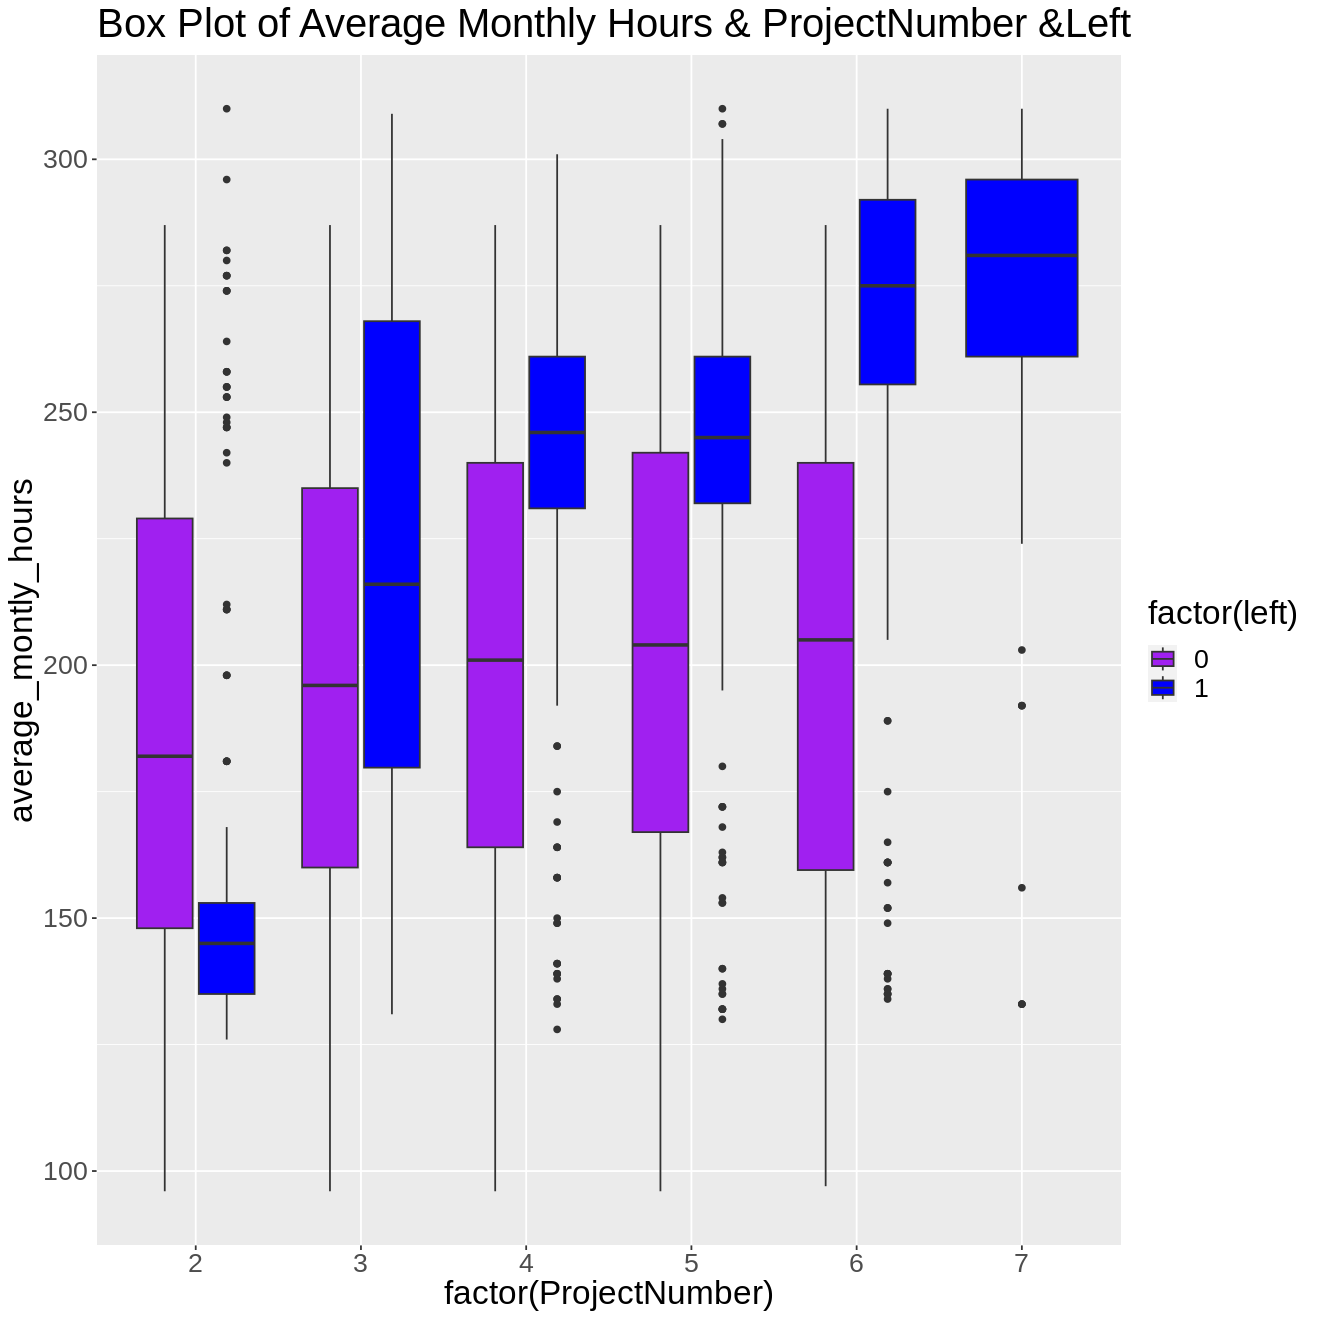

In [ ]:
p<-ggplot(HR_data, aes(x = factor(ProjectNumber), y = average_montly_hours, fill = factor(left))) +
  geom_boxplot() + scale_fill_manual(values = c("purple", "blue")) + theme(text = element_text(size = 20)) + labs(title = "Box Plot of Average Monthly Hours & ProjectNumber &Left")
print(p)

Employee that worked low hours and moderate hours tends to stay than those who worked more hours. This satisfies that it is not by the more projects and the more hours you worked that makes the employee to stay or leave. As we can see those employees who worked more hours and did more projects even left more. Notice from the box plot that Employees that stayed fall mostly on the average both for the project counts and for the number of hours.

# Using Chi-Square Test to check for associations between categorical variables and employee turnover.

**Create a contingency table for Department and turnover**

In [ ]:
#Create a contingency table for Department and turnover
test_table <- table(HR_data$Department, HR_data$left)

# Perform Chi-Square test
chi_squ_output <- chisq.test(test_table)

# Print the result
print(chi_squ_output)

# Extract p-value
p_value <- chi_squ_output$p.value

# Check for statistical significance
if (p_value < 0.05) {
  cat("The Chi-Square test indicates a significant association between Department and Turnover.\n")
} else {
  cat("The Chi-Square test does not show a significant association between Department and Turnover.\n")
}



	Pearson's Chi-squared test

data:  test_table
X-squared = 86.825, df = 9, p-value = 7.042e-15

The Chi-Square test indicates a significant association between Department and Turnover.


**Interpretation:**
The p-value is well below the common significance level of 0.05 (given as
7.042
×
1
0
−
15
7.042×10
−15
 ), indicating a highly significant result. Therefore, we would reject the null hypothesis.

**Conclusion:**
The Chi-Square test indicates a significant association between the "Department" variable and "Turnover." In other words, there is evidence to suggest that the distribution of turnover is not independent of the department, and there is likely an association between the department an employee works in and the likelihood of turnover.

**Create a contingency table for Salary and turnover**

In [ ]:
#Create a contingency table for Salary and turnover
test1_table <- table(HR_data$salary, HR_data$left)

# Perform Chi-Square test
chi_squ_output1 <- chisq.test(test1_table)

# Print the result
print(chi_squ_output1)

# Extract p-value
p_value <- chi_squ_output1$p.value

# Check for statistical significance
if (p_value < 0.05) {
  cat("The Chi-Square test indicates a significant association between Salary and Turnover.\n")
} else {
  cat("The Chi-Square test does not show a significant association between Salary and Turnover.\n")
}


	Pearson's Chi-squared test

data:  test1_table
X-squared = 381.23, df = 2, p-value < 2.2e-16

The Chi-Square test indicates a significant association between Salary and Turnover.


**Interpretation:**
The p-value is well below the common significance level of 0.05 (given as
<
2.2
×
1
0
−
16
<2.2×10
−16
 ), indicating an extremely significant result. Therefore, we would reject the null hypothesis.

**Conclusion:**
The Chi-Square test indicates a significant association between the "Salary" variable and "Turnover(left)." In other words, there is strong evidence to suggest that the distribution of turnover is not independent of salary levels, and there is likely a significant association between an employee's salary and the likelihood of turnover.








In [ ]:
# Degrees of freedom
df <- 2

# Probability level (alpha)
alpha <- 0.05

# Critical value for a two-sided test
critical_value <- qchisq(1 - alpha/2, df)

# Print the critical value
cat("Critical value for a two-sided test at alpha =", alpha, "with", df, "degrees of freedom:", critical_value, "\n")



# Degrees of freedom
df <- 9

# Probability level (alpha)
alpha <- 0.05

# Critical value for a two-sided test
critical_value <- qchisq(1 - alpha/2, df)

# Print the critical value
cat("Critical value for a two-sided test at alpha =", alpha, "with", df, "degrees of freedom:", critical_value, "\n")


Critical value for a two-sided test at alpha = 0.05 with 2 degrees of freedom: 7.377759 
Critical value for a two-sided test at alpha = 0.05 with 9 degrees of freedom: 19.02277 


**Summary:**

The critical value for a two-sided test at a significance level (alpha) of 0.05 with 9 degrees of freedom is approximately 19.02277. This means that if the Chi-Square test statistic is greater than 19.02277, therefore, we would reject the null hypothesis at the 0.05 significance level.
***
The critical value for 2 degrees of freedom is 7.377759. This is an illustration that as the degrees of freedom increase, the critical values also increase, reflecting the larger variability in the Chi-Square distribution.

#Feature Importance

In [ ]:
install.packages("Boruta")


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



 1. run of importance source...

 2. run of importance source...

 3. run of importance source...

 4. run of importance source...

 5. run of importance source...

 6. run of importance source...

 7. run of importance source...

 8. run of importance source...

 9. run of importance source...

 10. run of importance source...

After 10 iterations, +2 mins: 

 confirmed 9 attributes: average_montly_hours, Department, last_evaluation, ProjectNumber, promotion_last_5years and 4 more;

 no more attributes left.




Boruta performed 10 iterations in 1.968127 mins.
 9 attributes confirmed important: average_montly_hours, Department,
last_evaluation, ProjectNumber, promotion_last_5years and 4 more;
 No attributes deemed unimportant.


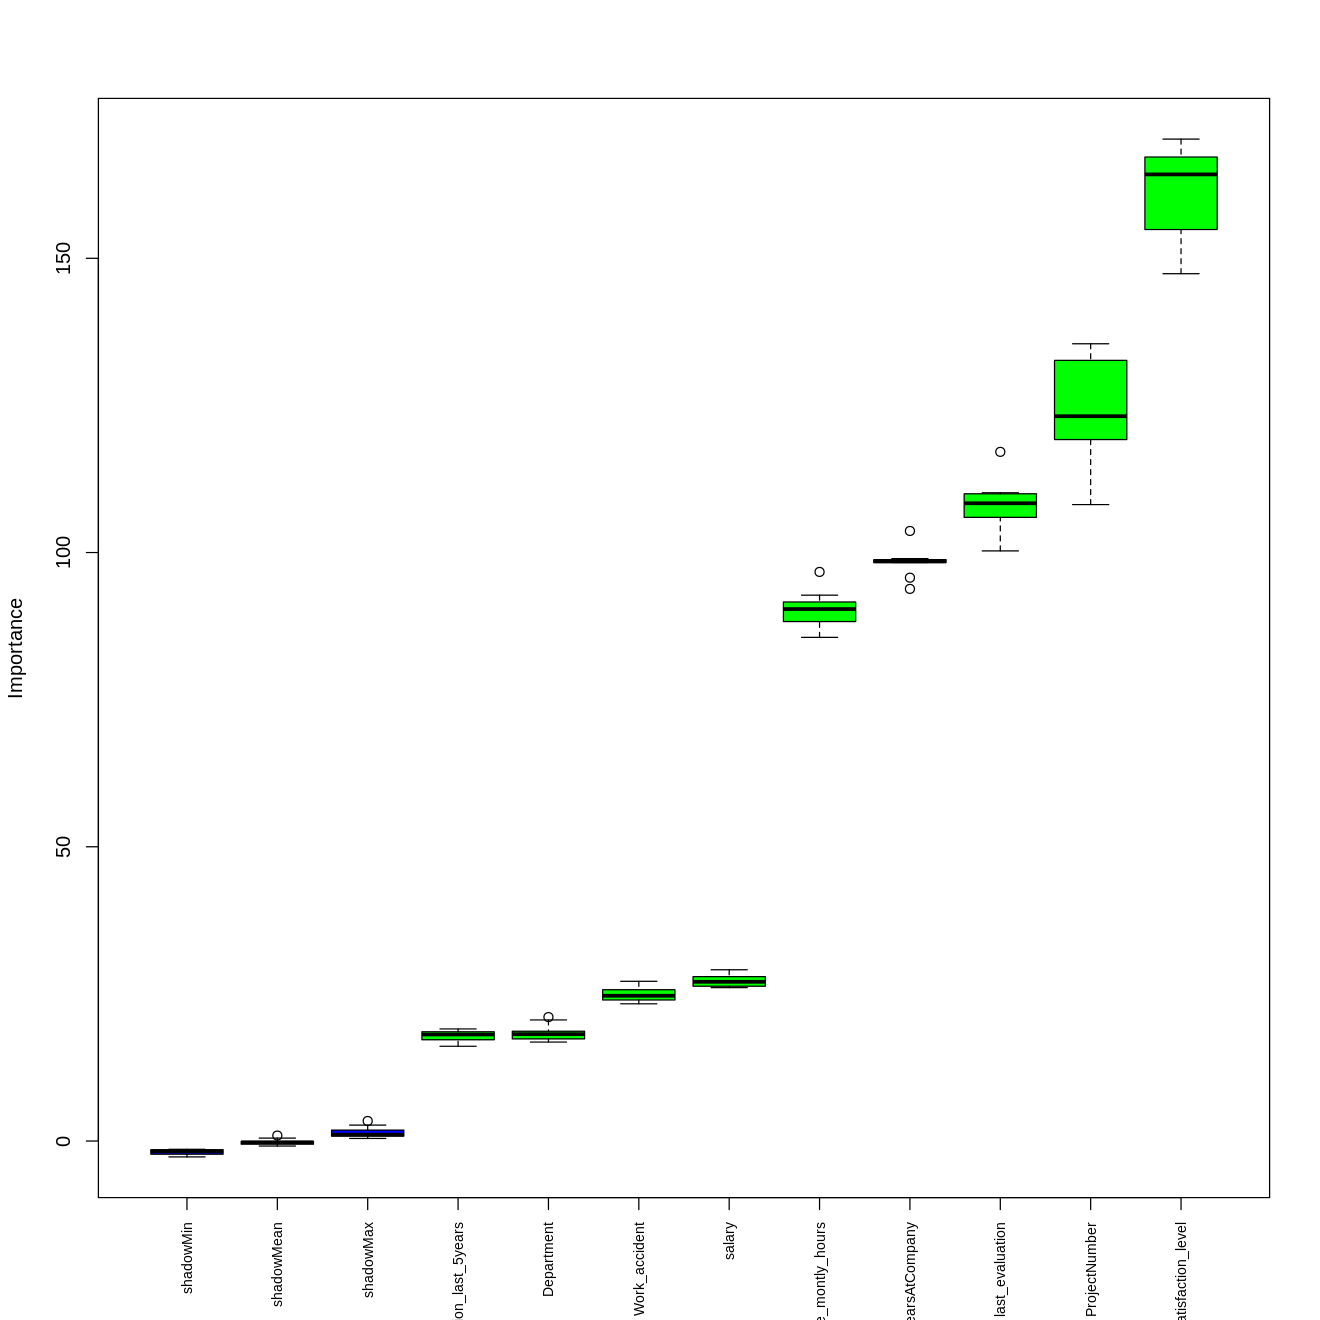

In [ ]:
library(Boruta)
HR_data$left<-as.factor(HR_data$left)
boruta.train <- Boruta(left~., data = HR_data, doTrace = 2)

print(boruta.train)
plot(boruta.train, xlab = "", xaxt = "n")

lz<-lapply(1:ncol(boruta.train$ImpHistory),function(i)
boruta.train$ImpHistory[is.finite(boruta.train$ImpHistory[,i]),i])
names(lz) <- colnames(boruta.train$ImpHistory)
Labels <- sort(sapply(lz,median))
axis(side = 1,las=2,labels = names(Labels),
at = 1:ncol(boruta.train$ImpHistory), cex.axis = 0.7)

In [ ]:
install.packages("ROCR")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:

install.packages("caTools")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
install.packages("Hmisc")


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
install.packages("gmodels")



Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
library(gmodels)
library (Hmisc)
library (caTools)
library (ROCR)

In [ ]:
if (!requireNamespace("caret", quietly = TRUE)) {
  install.packages("caret")
}

# Load the caret library
library(caret)
library(caret)

In [ ]:
# Split data into training and testing sets
set.seed(123)  # Set seed for reproducibility
train_index <- createDataPartition(HR_data$left, p = 0.8, list = FALSE)
train_data <- HR_data[train_index, ]
test_data <- HR_data[-train_index, ]

dim(train_data)
dim(test_data)


[1] 12000    10

[1] 2999   10

In [ ]:
# Install the pROC package if not already installed
if (!requireNamespace("pROC", quietly = TRUE)) {
  install.packages("pROC")
}
# Load the pROC library
library(pROC)

## MODELING WITH DECISION TREE

In [ ]:
install.packages("rpart")


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



           
predictions    0    1
          0 2265   67
          1   20  647
[1] "Accuracy: 0.970990330110037"
[1] "Precision: 0.906162464985994"
[1] "Recall (Sensitivity): 0.970014992503748"
[1] "F1 Score: 0.937002172338885"


Setting levels: control = 0, case = 1

Setting direction: controls < cases



[1] "AUC-ROC: 0.948704864878117"
n= 12000 

node), split, n, loss, yval, (yprob)
      * denotes terminal node

 1) root 12000 2857 0 (0.76191667 0.23808333)  
   2) satisfaction_level>=0.465 8624  815 0 (0.90549629 0.09450371)  
     4) SpentYearsAtCompany< 4.5 7065   94 0 (0.98669498 0.01330502) *
     5) SpentYearsAtCompany>=4.5 1559  721 0 (0.53752405 0.46247595)  
      10) last_evaluation< 0.815 608   33 0 (0.94572368 0.05427632) *
      11) last_evaluation>=0.815 951  263 1 (0.27655100 0.72344900)  
        22) average_montly_hours< 215.5 177   14 0 (0.92090395 0.07909605) *
        23) average_montly_hours>=215.5 774  100 1 (0.12919897 0.87080103)  
          46) SpentYearsAtCompany>=6.5 41    0 0 (1.00000000 0.00000000) *
          47) SpentYearsAtCompany< 6.5 733   59 1 (0.08049113 0.91950887) *
   3) satisfaction_level< 0.465 3376 1334 1 (0.39514218 0.60485782)  
     6) ProjectNumber>=2.5 1972  808 0 (0.59026369 0.40973631)  
      12) satisfaction_level>=0.115 1258   94 0 

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



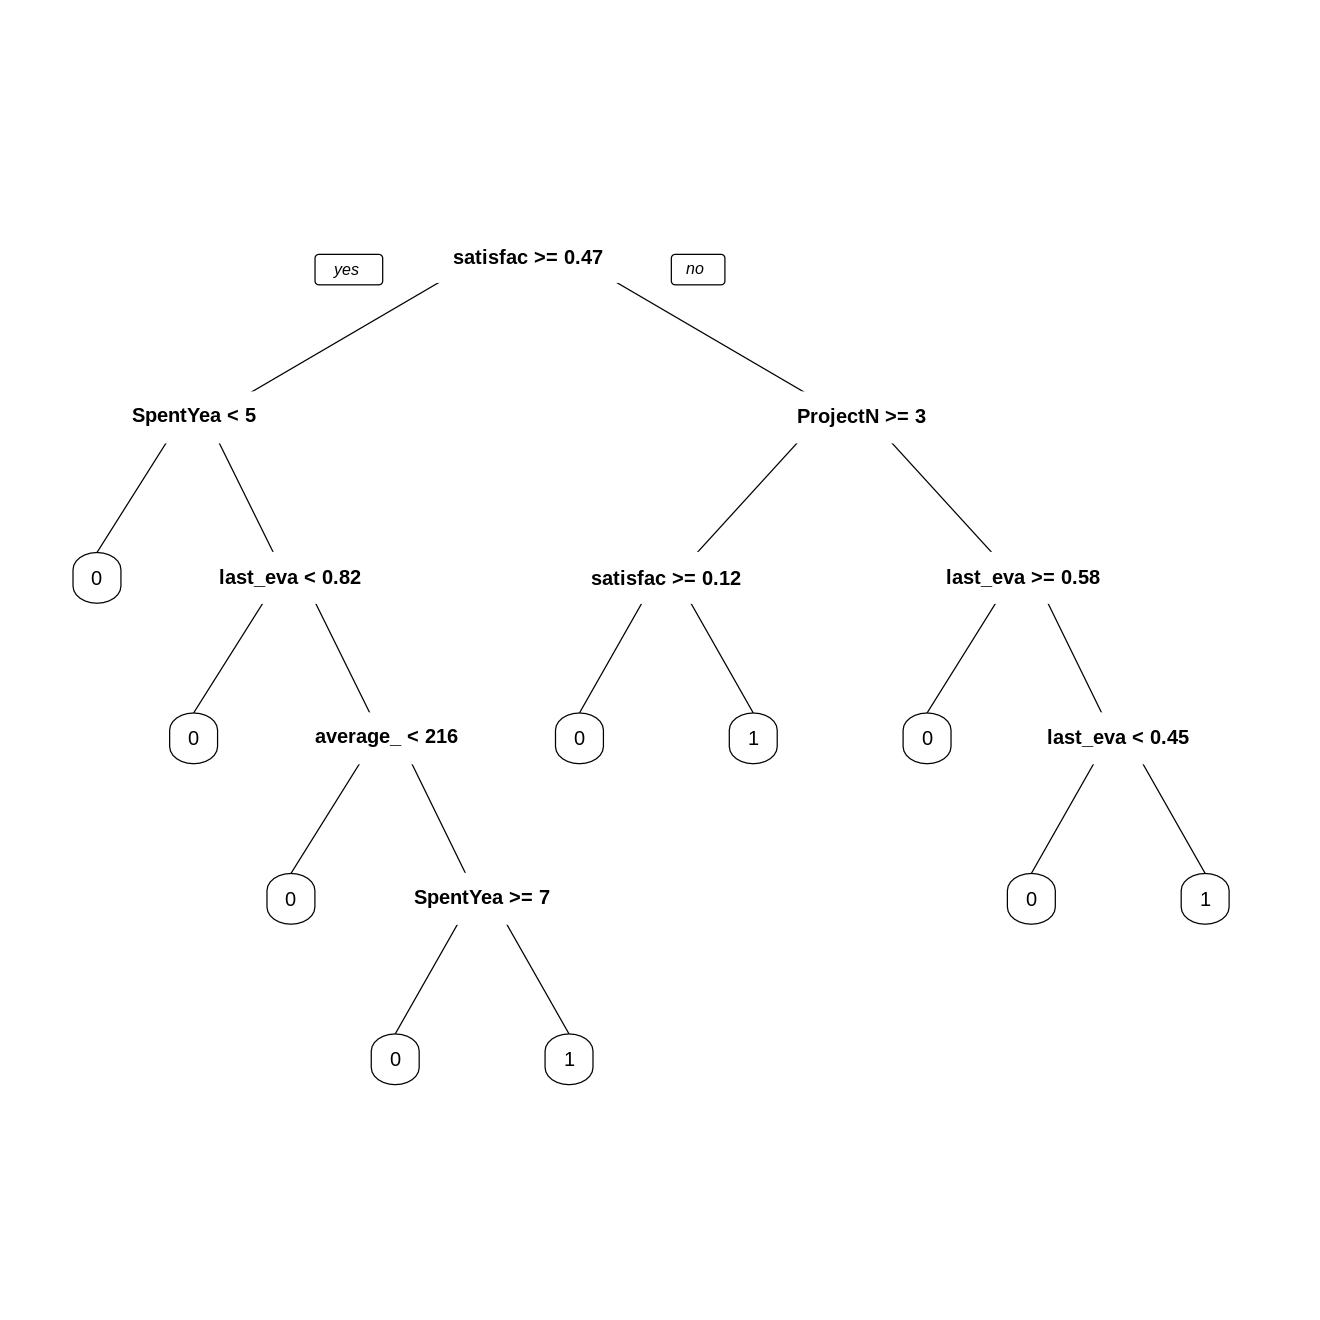

In [ ]:
# Installing the required package if not already installed
install.packages("rpart")

# Load the required library
library(rpart)


# Creating a data partition for training and testing
set.seed(123)
index <- createDataPartition(HR_data$left, p = 0.8, list = FALSE)
train_data <- HR_data[index, ]
test_data <- HR_data[-index, ]

# Build a decision tree model
tree_model <- rpart(left ~ ., data = train_data, method = "class")

# Make predictions on the test set
predictions <- predict(tree_model, test_data, type = "class")

# Evaluate the model
confusion_matrix <- table(predictions, test_data$left)
print(confusion_matrix)

# Calculate accuracy of the model
accuracy <- sum(diag(confusion_matrix)) / sum(confusion_matrix)
print(paste("Accuracy:", accuracy))

# Calculate precision
precision <- confusion_matrix[2, 2] / sum(confusion_matrix[, 2])
print(paste("Precision:", precision))

# Calculate recall (sensitivity)
recall <- confusion_matrix[2, 2] / sum(confusion_matrix[2, ])
print(paste("Recall (Sensitivity):", recall))

# Calculate F1 score
f1_score <- 2 * (precision * recall) / (precision + recall)
print(paste("F1 Score:", f1_score))

# Calculate AUC-ROC (requires the pROC package)
# install.packages("pROC")
# library(pROC)
 roc_curve <- roc(test_data$left, as.numeric(predictions))
print(paste("AUC-ROC:", auc(roc_curve)))

# Print the decision tree
print(tree_model)

# Plot the decision tree (requires the rpart.plot package)
install.packages("rpart.plot")
library(rpart.plot)
prp(tree_model)


#MODELING WITH RANDOM FOREST

In [ ]:
# Install the randomForest package
install.packages("randomForest")

# Load the randomForest library
library(randomForest)


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

randomForest 4.7-1.1

Type rfNews() to see new features/changes/bug fixes.


Attaching package: ‘randomForest’


The following object is masked from ‘package:ggplot2’:

    margin


The following object is masked from ‘package:dplyr’:

    combine


The following object is masked from ‘package:psych’:

    outlier




In [ ]:
# Create a data partition for training and testing
set.seed(123)
index <- createDataPartition(HR_data$left, p = 0.8, list = FALSE)
train_data <- HR_data[index, ]
test_data <- HR_data[-index, ]

# Build a Random Forest classification model
rf_model <- randomForest(left ~ ., data = train_data, ntree = 100, mtry = 4)

# Make predictions on the test set
rf_predictions <- predict(rf_model, test_data)

# Evaluate the Random Forest model
rf_confusion_matrix <- table(rf_predictions, test_data$left)
print("Random Forest Confusion Matrix:")
print(rf_confusion_matrix)

# Calculate Random Forest accuracy
rf_accuracy <- sum(diag(rf_confusion_matrix)) / sum(rf_confusion_matrix)
print(paste("Random Forest Accuracy:", rf_accuracy))

# Calculate Random Forest precision
rf_precision <- rf_confusion_matrix[2, 2] / sum(rf_confusion_matrix[, 2])
print(paste("Random Forest Precision:", rf_precision))

# Calculate Random Forest recall (sensitivity)
rf_recall <- rf_confusion_matrix[2, 2] / sum(rf_confusion_matrix[2, ])
print(paste("Random Forest Recall (Sensitivity):", rf_recall))

# Calculate Random Forest F1 score
rf_f1_score <- 2 * (rf_precision * rf_recall) / (rf_precision + rf_recall)
print(paste("Random Forest F1 Score:", rf_f1_score))

# Calculate Random Forest AUC-ROC (requires the pROC package)
rf_roc_curve <- roc(test_data$left, as.numeric(rf_predictions))
print(paste("Random Forest AUC-ROC:", auc(rf_roc_curve)))



[1] "Random Forest Confusion Matrix:"
              
rf_predictions    0    1
             0 2282   22
             1    3  692
[1] "Random Forest Accuracy: 0.991663887962654"
[1] "Random Forest Precision: 0.969187675070028"
[1] "Random Forest Recall (Sensitivity): 0.99568345323741"
[1] "Random Forest F1 Score: 0.982256919801277"


Setting levels: control = 0, case = 1

Setting direction: controls < cases



[1] "Random Forest AUC-ROC: 0.983937382392782"


In [ ]:
# Metrics for Decision Tree
cat("Decision Tree Metrics:\n")
cat(paste("  Accuracy:          ", round(accuracy, 4), "\n"))
cat(paste("  Precision:         ", round(precision, 4), "\n"))
cat(paste("  Recall (Sensitivity): ", round(recall, 4), "\n"))
cat(paste("  F1 Score:          ", round(f1_score, 4), "\n"))
 cat(paste("  AUC-ROC:           ", round(auc(roc_curve), 4), "\n"))

cat("\n")

# Metrics for Random Forest
cat("Random Forest Metrics:\n")
cat(paste("  Accuracy:          ", round(rf_accuracy, 4), "\n"))
cat(paste("  Precision:         ", round(rf_precision, 4), "\n"))
cat(paste("  Recall (Sensitivity): ", round(rf_recall, 4), "\n"))
cat(paste("  F1 Score:          ", round(rf_f1_score, 4), "\n"))
 cat(paste("  AUC-ROC:           ", round(auc(rf_roc_curve), 4), "\n"))


Decision Tree Metrics:
  Accuracy:           0.971 
  Precision:          0.9062 
  Recall (Sensitivity):  0.97 
  F1 Score:           0.937 
  AUC-ROC:            0.9487 

Random Forest Metrics:
  Accuracy:           0.9917 
  Precision:          0.9692 
  Recall (Sensitivity):  0.9957 
  F1 Score:           0.9823 
  AUC-ROC:            0.9839 


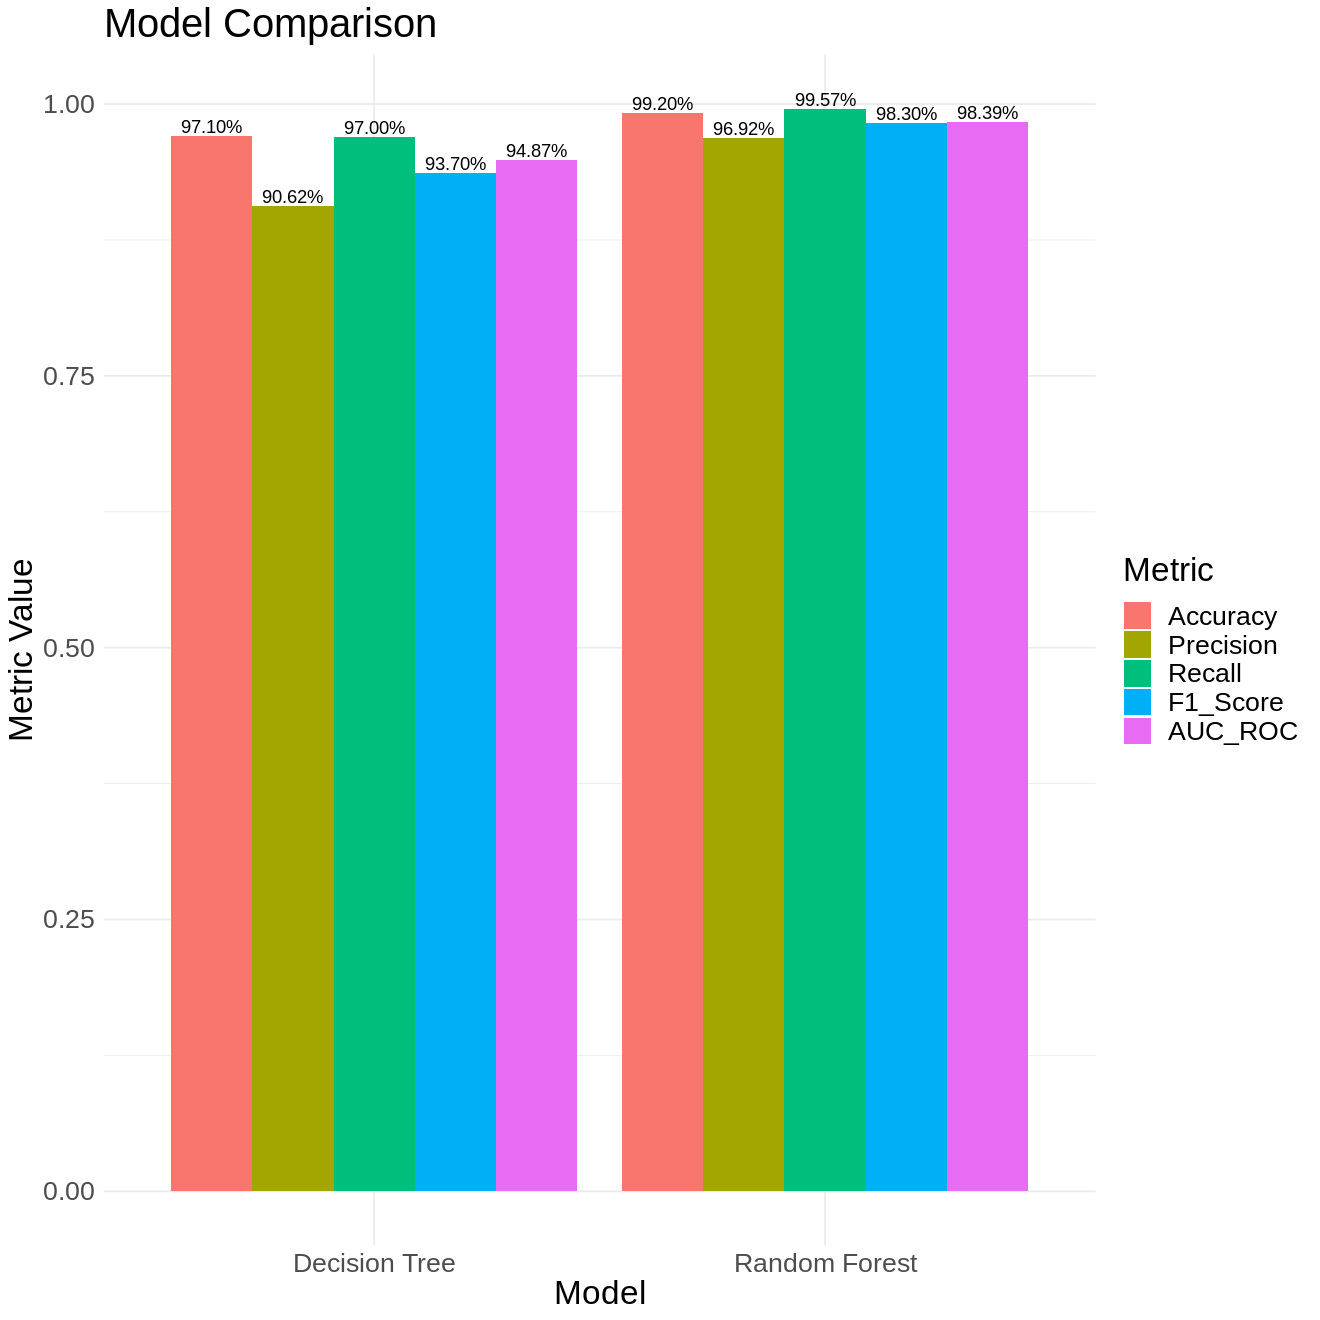

In [ ]:

model_names <- c("Decision Tree", "Random Forest")
accuracy <- c(0.971, 0.992)
precision <- c(0.9062, 0.9692)
recall <- c(0.97, 0.9957)
f1_score <- c(0.937, 0.983)
auc_roc <- c(0.9487, 0.9839)

# Combining  metrics into a data frame
comparison_data <- data.frame(Model = model_names, Accuracy = accuracy, Precision = precision, Recall = recall, F1_Score = f1_score, AUC_ROC = auc_roc)

# Loading the ggplot2 package
library(ggplot2)

# Melting the data for better plotting
library(reshape2)
comparison_data_melted <- melt(comparison_data, id.vars = "Model")

# Plotting a bar plot
ggplot(comparison_data_melted, aes(x = Model, y = value, fill = variable)) +
  geom_bar(stat = "identity", position = "dodge") +  geom_text(aes(label = scales::percent(value)), position = position_dodge(width = 0.9), vjust = -0.2) +  # Add percentage labels
  labs(title = "Model Comparison",
       x = "Model",
       y = "Metric Value",
       fill = "Metric") +
  theme_minimal() + theme(text = element_text(size = 20))


**Decision Tree Metrics:**

Accuracy (0.971): 97.1% of the instances were classified correctly by the Decision Tree.
Precision (0.9062):  About 90.6% of instances predicted as positive by the Decision Tree were actually positive.

Recall (Sensitivity) (0.97):  About 97.0% of actual positive instances were correctly identified by the Decision Tree.

F1 Score (0.937): Provides a balance between precision and recall. A higher F1 score indicates better balance.

AUC-ROC (0.9487):  It measures the ability of the model to distinguish between positive and negative instances. A higher AUC-ROC indicates better discrimination.
***
**Random Forest Metrics:**

Accuracy (0.992): The Random Forest model achieved a higher accuracy of about 99.2%, indicating excellent overall performance.

Precision (0.9692): Similar to the Decision Tree, about 96.9% of instances predicted as positive by the Random Forest were actually positive.

Recall (Sensitivity) (0.9971): The Random Forest demonstrated high recall, correctly identifying about 99.7% of actual positive instances.

F1 Score (0.983): The Random Forest achieved a high F1 score, indicating a strong balance between precision and recall.

AUC-ROC (0.9842): The Random Forest exhibited a high AUC-ROC, suggesting excellent discrimination between positive and negative instances.
***
**In summary**, both models perform well, but the Random Forest model outperforms the Decision Tree in terms of accuracy, recall, F1 score, and AUC-ROC. Random Forest's ensemble nature often leads to improved performance and robustness compared to a single Decision Tree.

## INTERPRETATION OF THE DATASET


Employees who are underworked (less than 150hr/month or 6hr/day) are very likely to leave.

Employees who are overworked (more than 250hr/month or 10hr/day) are very likely to leave.

Employees who work in moderate hours will stay.

Employees with high or low evaluations should be considered.

Employees with low and medium salaries are the majority of the employee's turnover.
Employees good appraisal should be encouraged with bonuses or salary increment to reduce employees turnover.

Employees who did 2,6, or 7 projects left the company.

Employee with high satisfaction will likely stay than employee with low satisfaction level.

In [ ]:
#Using these to check for employee's attrition on new dataset similar to the features i used in buliding these models

# Decision Tree predictions
#dt_predictions <- predict(tree_model, new_data, type = "class")

# Random Forest predictions
#rf_predictions <- predict(rf_model, new_data)

# Display the predictions
#cat("Decision Tree Predictions:\n")
#print(dt_predictions)

#cat("\nRandom Forest Predictions:\n")
#print(rf_predictions)
